# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import ggplot, aes, labs, theme, theme_classic, facet_wrap, element_text
from plotnine import geom_histogram, geom_bar, geom_point
import missingno as msno
from pandas.plotting import scatter_matrix

## Training Set

In [2]:
campaign_ad = pd.read_csv("MLUnige2023_subscriptions_train.csv", index_col="Id")
campaign_ad.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8952 entries, 0 to 8951
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               8952 non-null   int64  
 1   job               8952 non-null   object 
 2   marital           8952 non-null   object 
 3   education         8952 non-null   object 
 4   device            8952 non-null   object 
 5   day               8952 non-null   int64  
 6   month             8952 non-null   int64  
 7   time_spent        8952 non-null   float64
 8   banner_views      8952 non-null   int64  
 9   banner_views_old  8952 non-null   int64  
 10  days_elapsed_old  8952 non-null   int64  
 11  outcome_old       8952 non-null   object 
 12  X1                8952 non-null   int64  
 13  X2                8952 non-null   int64  
 14  X3                8952 non-null   int64  
 15  X4                8952 non-null   float64
 16  subscription      8952 non-null   int64  
dtype

There apppear to be no missing values in dataset indentified by Python.
However, the columns

- `job`
- `education`
- `device`
- `outcome_old`

have missing values in the form of the string `'na'` and this can be seen within the output below.

In [3]:
campaign_ad

age                job   marital    education      device  day  month   
Id                                                                            
0      28          freelance   married  grad_school  smartphone    4      2  \
1      48  industrial_worker   married   university  smartphone   30      4   
2      27            teacher   married   university  smartphone   14      7   
3      44         unemployed  divorced   university  smartphone   13      5   
4      29            manager    single  grad_school  smartphone   26      4   
...   ...                ...       ...          ...         ...  ...    ...   
8947   54  industrial_worker   married   university  smartphone   16      7   
8948   43  industrial_worker   married   university  smartphone    4      2   
8949   27            manager    single  grad_school          na    5      6   
8950   77            retired  divorced  grad_school  smartphone   14      4   
8951   33         technology    single  grad_school  smartphone    4      5   

      time_spent  banner_views  banner_views_old  days_elapsed_old   
Id                                                                   
0          26.80             3                 4               196  \
1          13.05             1                 1                79   
2           8.10             3                 0                -1   
3           7.10             2                 1               369   
4          15.90             2                 2               143   
...          ...           ...               ...               ...   
8947        7.30             1                 0                -1   
8948       37.75             2                 0                -1   
8949       29.00             3                 0                -1   
8950        7.55             1                 0                -1   
8951       29.10             1                 1                66   

     outcome_old  X1  X2  X3        X4  subscription  
Id                                                    
0        failure   0   0   1  0.072803             1  
1        success   0   0   0  0.075454             1  
2             na   0   1   1  0.068110             0  
3          other   0   0   1  0.091942             0  
4        success   0   0   0  0.085922             1  
...          ...  ..  ..  ..       ...           ...  
8947          na   1   0   0  0.072803             0  
8948          na   0   0   1  0.081456             1  
8949          na   0   0   1  0.079186             1  
8950          na   0   0   0  0.115102             1  
8951     success   0   0   1  0.087656             1  

[8952 rows x 17 columns]

Therefore, we replace `na` with `nan` that will be recoginzed by Python.

In [4]:
campaign_ad.replace('na', np.nan, inplace=True)

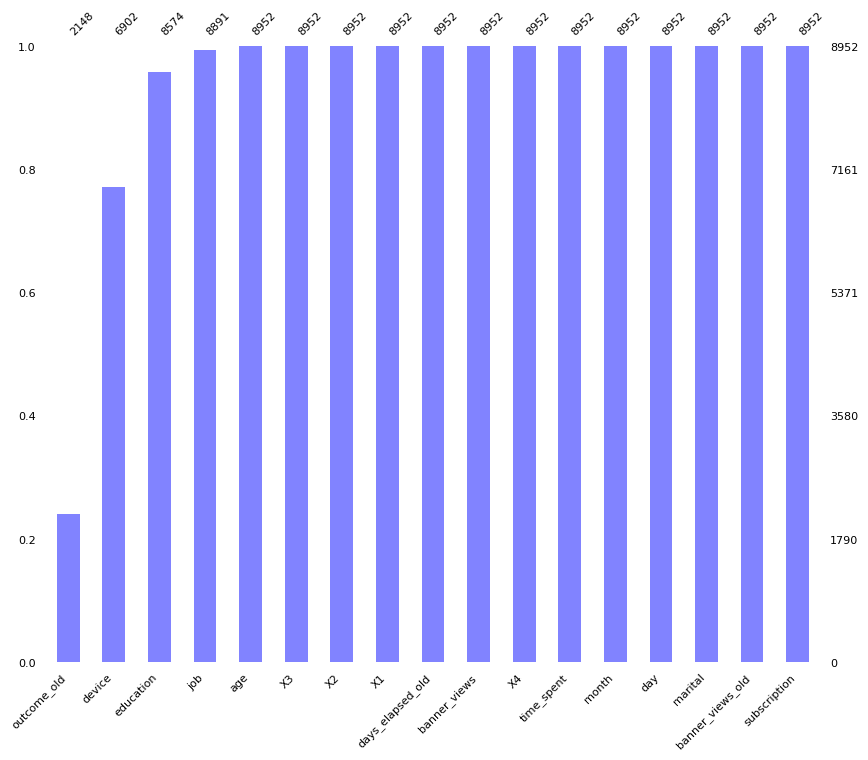

In [5]:
# Set the desired color
color = '#2A76B1'  # Replace with your preferred color

msno.bar(campaign_ad, figsize = (10,8), fontsize = 8, color = color, sort = "ascending",);

Now, we can clearly see the respective missing values throughout the data set.


In [6]:
campaign_ad.describe()

age          day        month   time_spent  banner_views   
count  8952.000000  8952.000000  8952.000000  8952.000000   8952.000000  \
mean     41.201743    15.663762     6.207328    17.130306      2.540550   
std      11.638321     8.379622     2.509444    16.902741      2.824065   
min      18.000000     1.000000     1.000000     0.000000      1.000000   
25%      32.000000     8.000000     5.000000     6.100000      1.000000   
50%      39.000000    16.000000     6.000000    11.450000      2.000000   
75%      49.000000    21.000000     8.000000    22.500000      3.000000   
max      95.000000    31.000000    12.000000   245.400000     63.000000   

       banner_views_old  days_elapsed_old           X1           X2   
count       8952.000000       8952.000000  8952.000000  8952.000000  \
mean           0.759160         49.403262     0.141086     0.013963   
std            2.099277        107.365840     0.348129     0.117345   
min            0.000000         -1.000000     0.000000     0.000000   
25%            0.000000         -1.000000     0.000000     0.000000   
50%            0.000000         -1.000000     0.000000     0.000000   
75%            0.000000         -1.000000     0.000000     0.000000   
max           58.000000        854.000000     1.000000     1.000000   

                X3           X4  subscription  
count  8952.000000  8952.000000   8952.000000  
mean      0.496984     0.086603      0.416443  
std       0.500019     0.030253      0.492996  
min       0.000000     0.000000      0.000000  
25%       0.000000     0.073891      0.000000  
50%       0.000000     0.077661      0.000000  
75%       1.000000     0.087768      1.000000  
max       1.000000     0.810043      1.000000

From a quantitative view, there are several factors that we can interpret:
- The average age if 41 years.
- The time spent is associated with how long the user looked at the banner last time, averaged about 17.1 seconds.
- Typically, a banner is seen 2.54 times on average, while the old banner was viewed less frequently at 0.76. 
- The `days_elapased_old` has many -1 values within the statistical measures because the individual never saw the banner. 

In [31]:
pd.options.display.max_seq_items = 2000
# Extract non-numerical predictors by mean and count
for col in campaign_ad.select_dtypes(exclude = "number").columns:
  print(str(campaign_ad[[col, "subscription"]].groupby(col, as_index = False).mean()))
  print(str(campaign_ad[[col, "subscription"]].groupby(col, as_index = False).count()))


                  job  subscription
0        entrepreneur      0.338290
1           freelance      0.450311
2         housekeeper      0.308642
3   industrial_worker      0.298204
4             manager      0.463907
5             retired      0.617597
6            salesman      0.323810
7             student      0.679856
8             teacher      0.431648
9          technology      0.394502
10         unemployed      0.519713
                  job  subscription
0        entrepreneur           269
1           freelance           322
2         housekeeper           243
3   industrial_worker          1670
4             manager          1981
5             retired           591
6            salesman           735
7             student           278
8             teacher          1068
9          technology          1455
10         unemployed           279
    marital  subscription
0  divorced      0.414725
1   married      0.382283
2    single      0.479100
    marital  subscription
0  div

The way one can interpret this table is by reviewing `entrepreneur` under job and looking at the `subscription` value, which corresponds to a 33.8% probability that this indiviaul is subscribed. For example, `students` appear to have the highest average of customers who have a subscription at 68% within this category. Therefore, we can assume that the individuals who typically have the highest probability of having a subscription are the following: `students` who are `single` that went or are enrolled to `graduate school` and uses a `smartphone` where the outcome of the old (and related) online ads campaign as a `success`.

c:\Users\emann\anaconda3\lib\site-packages\plotnine\themes\themeable.py:1902: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This paramater will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.


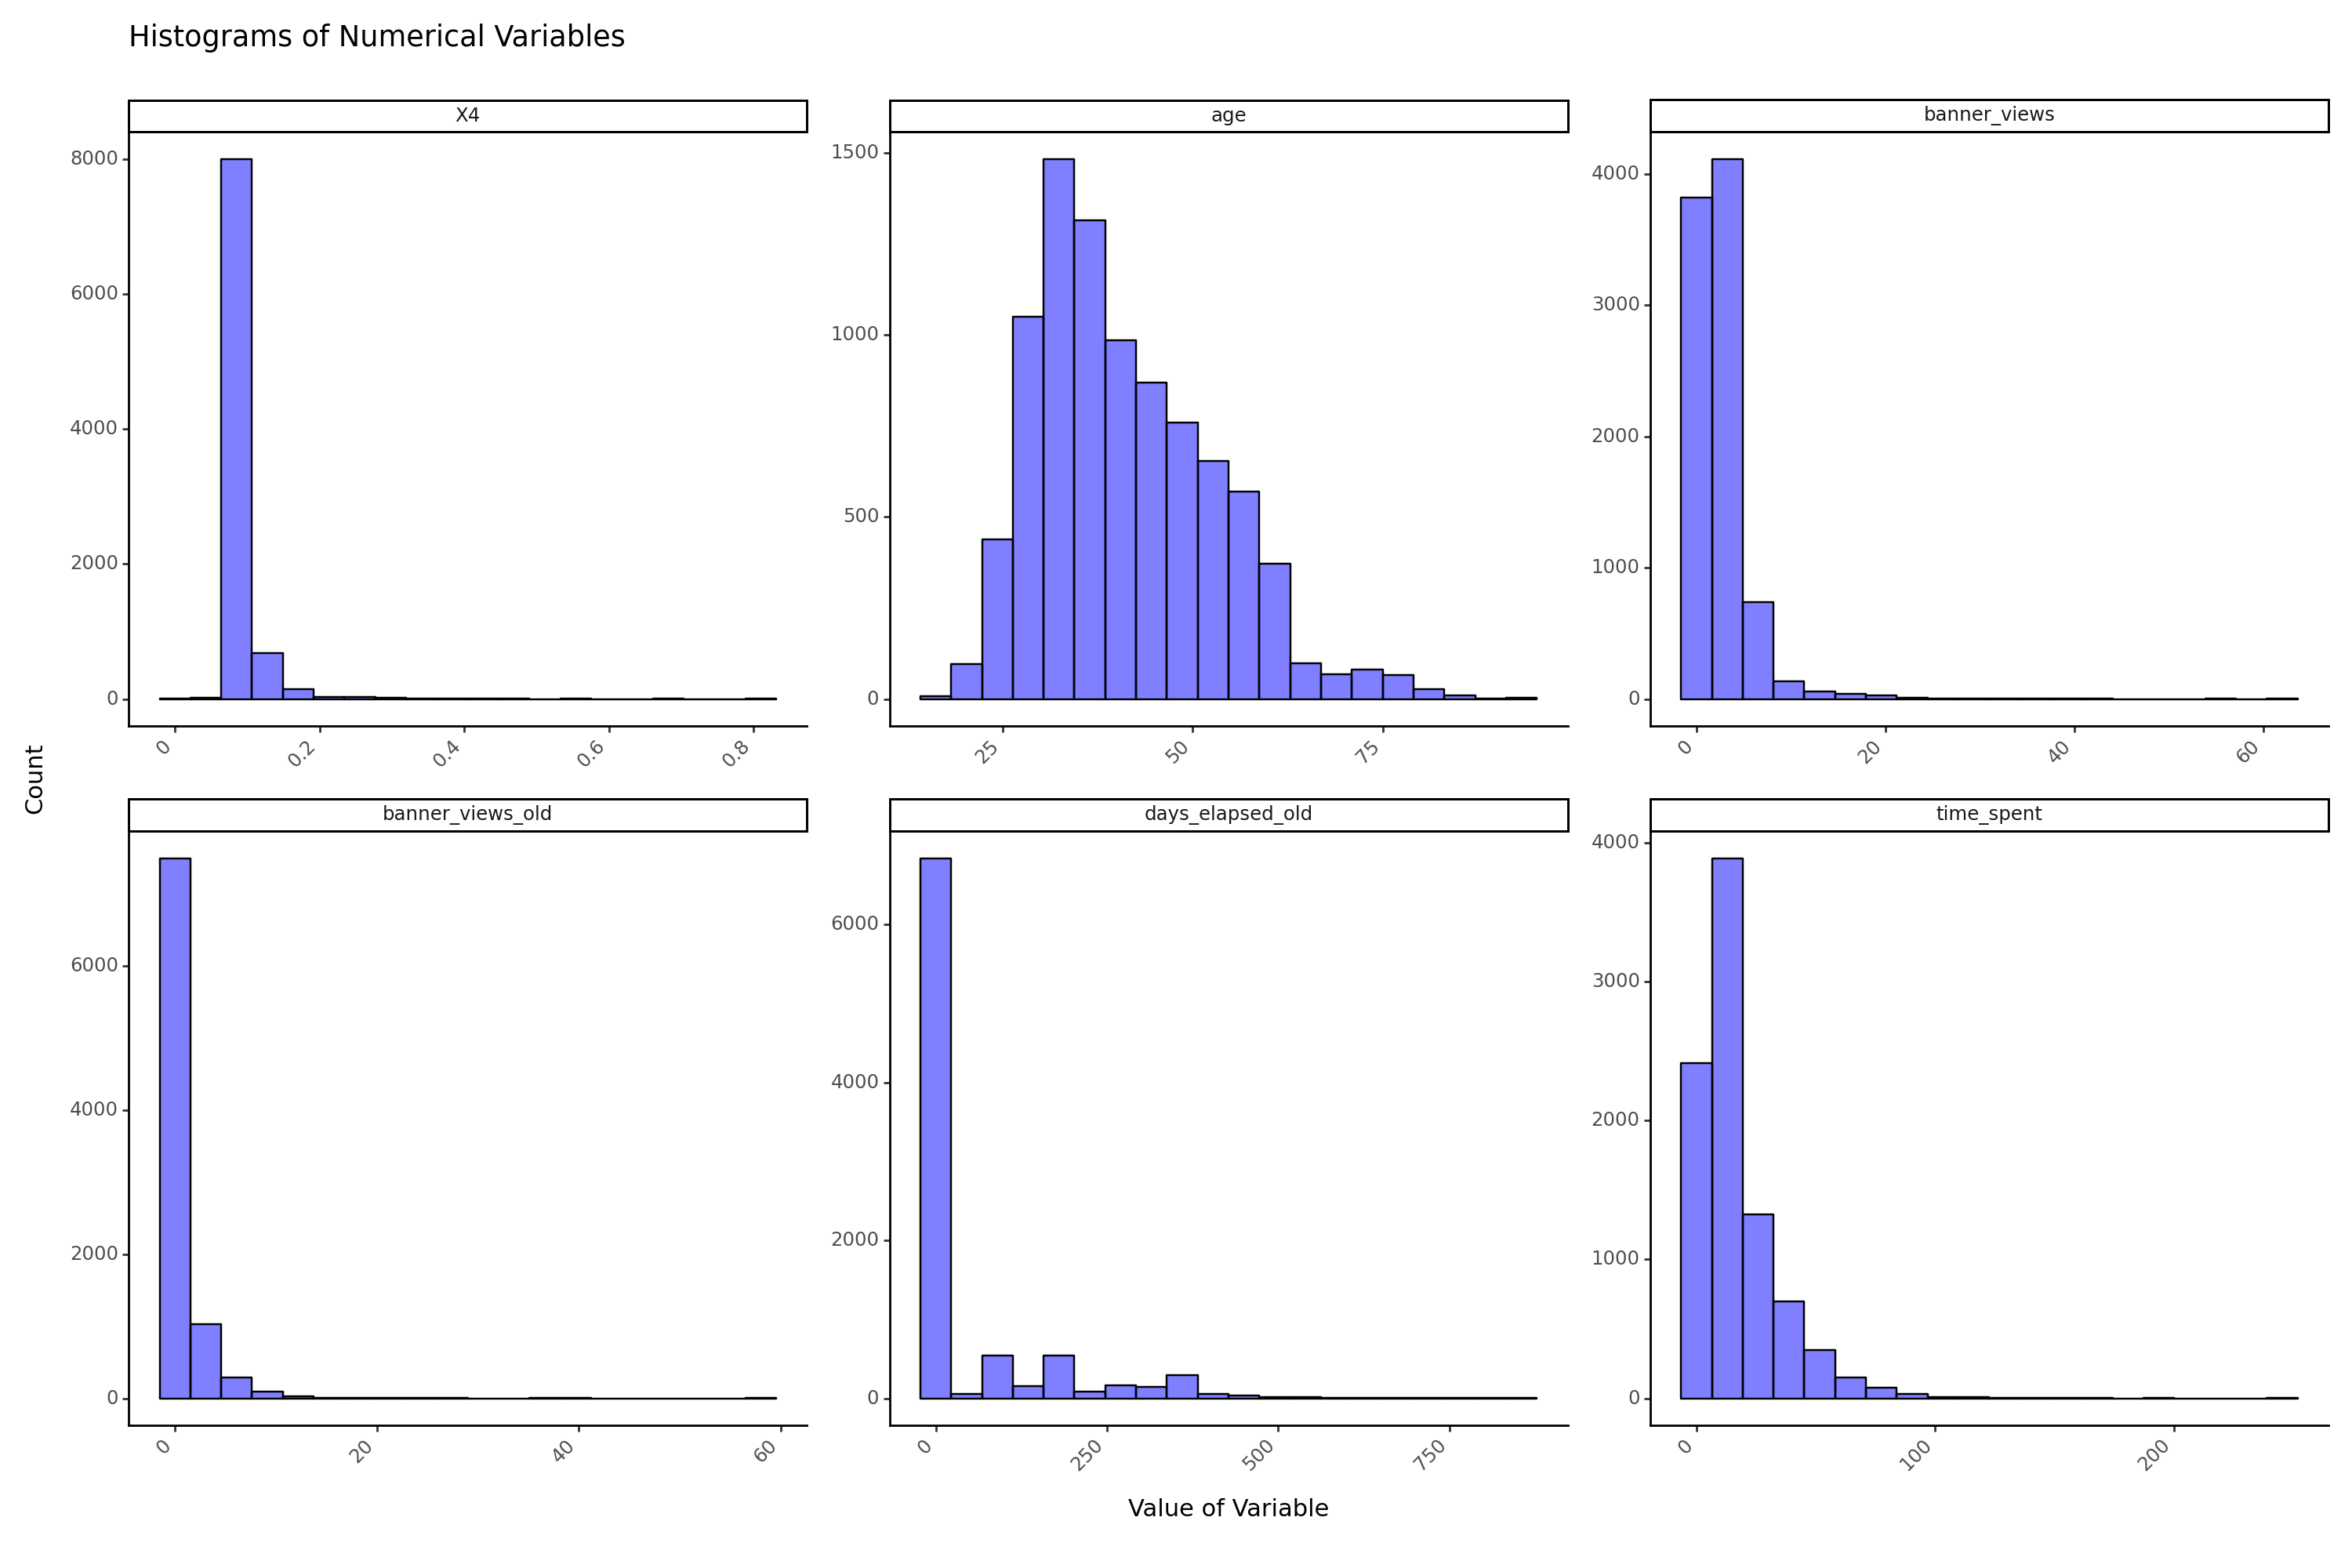

<Figure Size: (1500 x 1000)>

In [8]:
# Plot histogram for continuous variables to look at distribution
camp_num_melt = campaign_ad[['age', 'time_spent', 'banner_views', 'banner_views_old', 'days_elapsed_old', 'X4']].melt()

ggplot(camp_num_melt) + \
    aes('value') + \
    facet_wrap('variable', scales = 'free') + \
    geom_histogram(bins = 20, color = 'black', fill = '#2A76B1', alpha = 0.5) + \
    theme_classic() + \
    theme(subplots_adjust = {'wspace': 0.5, 'hspace': 0.5}, 
          axis_text_x = element_text(rotation = 45, ha = 'right'),
          figure_size = (15, 10)) + \
    labs(title = 'Histograms of Numerical Variables',
         x = 'Value of Variable',
         y = 'Count')

It appears that all the continuous predictors are skewed. Therefore, we will need to transform these variables depending on the specific model. These transformations will occur within each of the respestive model notebooks.

c:\Users\emann\anaconda3\lib\site-packages\plotnine\themes\themeable.py:1902: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This paramater will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.


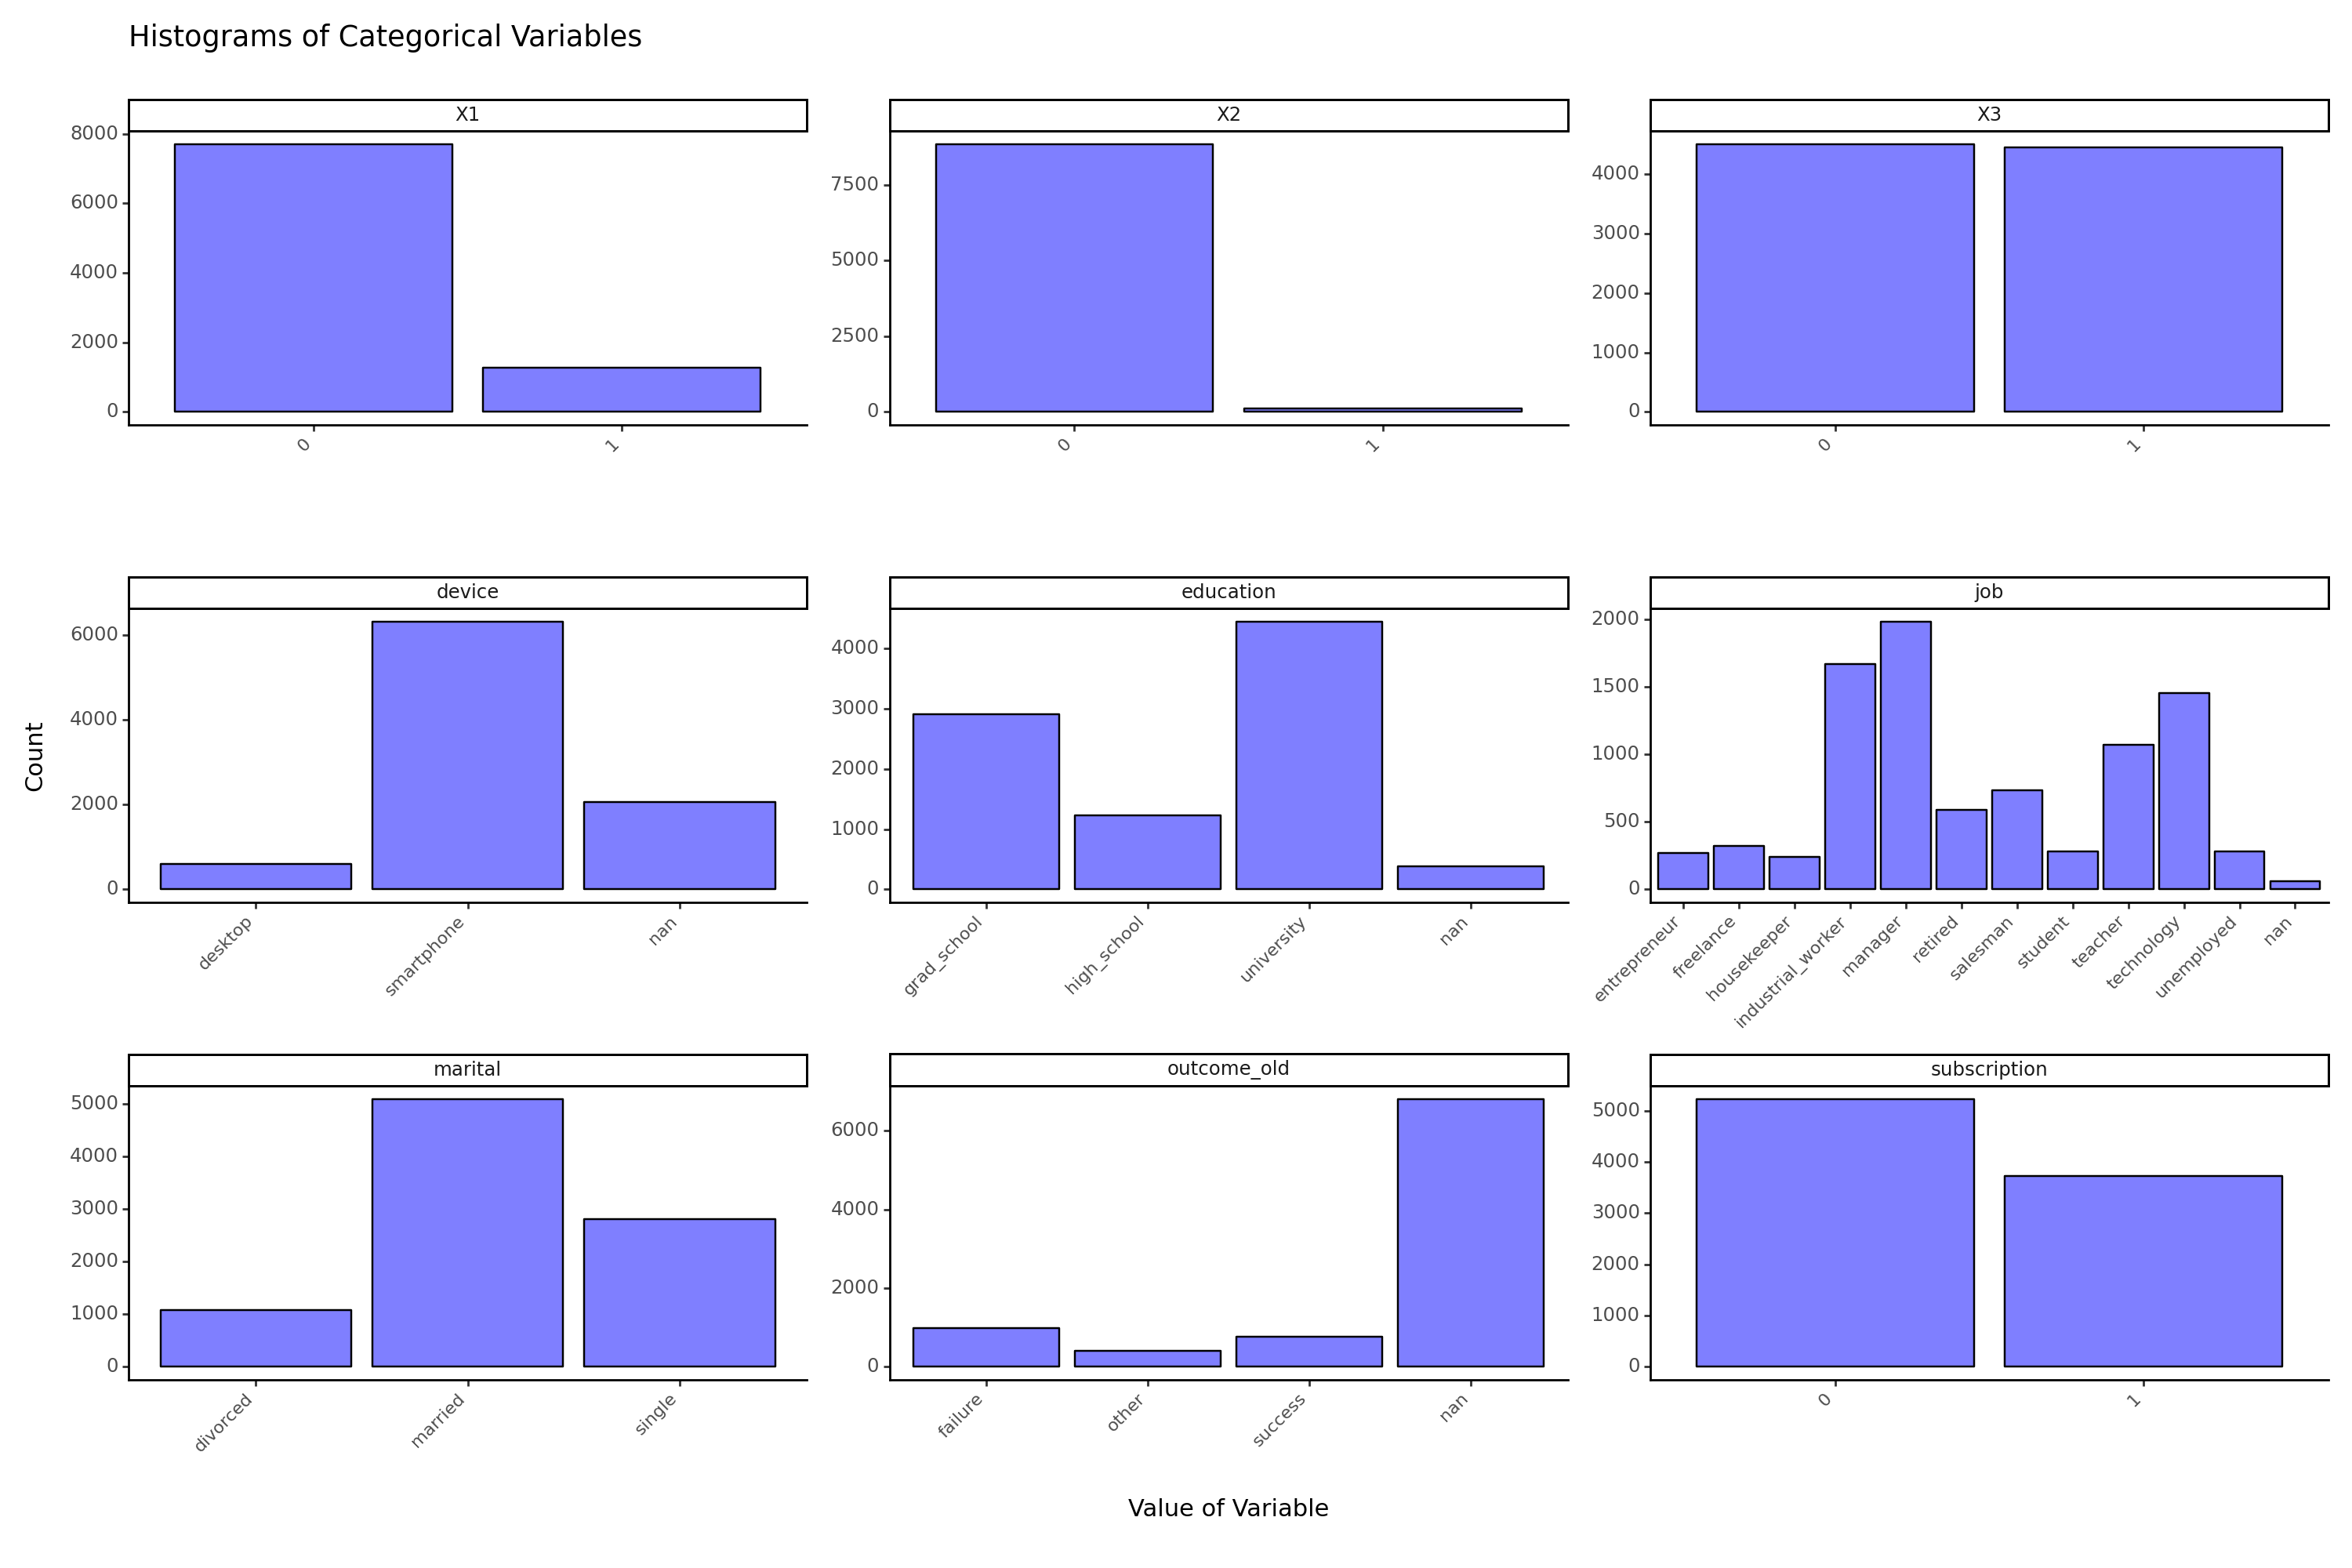

<Figure Size: (1500 x 1000)>

In [9]:
# Plot histogram for qualitative variables to look at distribution
camp_cat_melt = campaign_ad[['job', 'marital', 'education', 'device', 'outcome_old', 'X1', 'X2', 'X3', 'subscription']].melt()

ggplot(camp_cat_melt) + \
    aes('value') + \
    facet_wrap('variable', scales = 'free') + \
    geom_bar(fill = '#2A76B1', color = 'black', alpha = 0.5) + \
    theme_classic() + \
    theme(subplots_adjust = {'wspace': 0.5, 'hspace': 0.5},
          axis_text_x = element_text(angle = 45, vjust = 1, hjust = 1, size = 8),
          figure_size = (15, 10),
          axis_title_x = element_text(margin = {'t': 20})) + \
    labs(title = 'Histograms of Categorical Variables - Train',
         x = 'Value of Variable',
         y = 'Count')

These bar charts help to visualize how the observations within the categorical predictors are distributed between their respective groupings. For instance, `married` under `marital` and `manager` within the job levels have the most observations. By knowing this information, it may help later if missing value imputation is needed.

## Possible Feature Engineering

Feature engineering involves the extraction and transformation of variables from the original data by converting those observations into desired features. This process was explored to get a better understanding of how the categorical variables relate to the response. In addition, some of the predictors had many levels. Therefore, the relationship to `subscription` was analyzed to see if these levels could possibly be combined to reduce the number of parameters.  

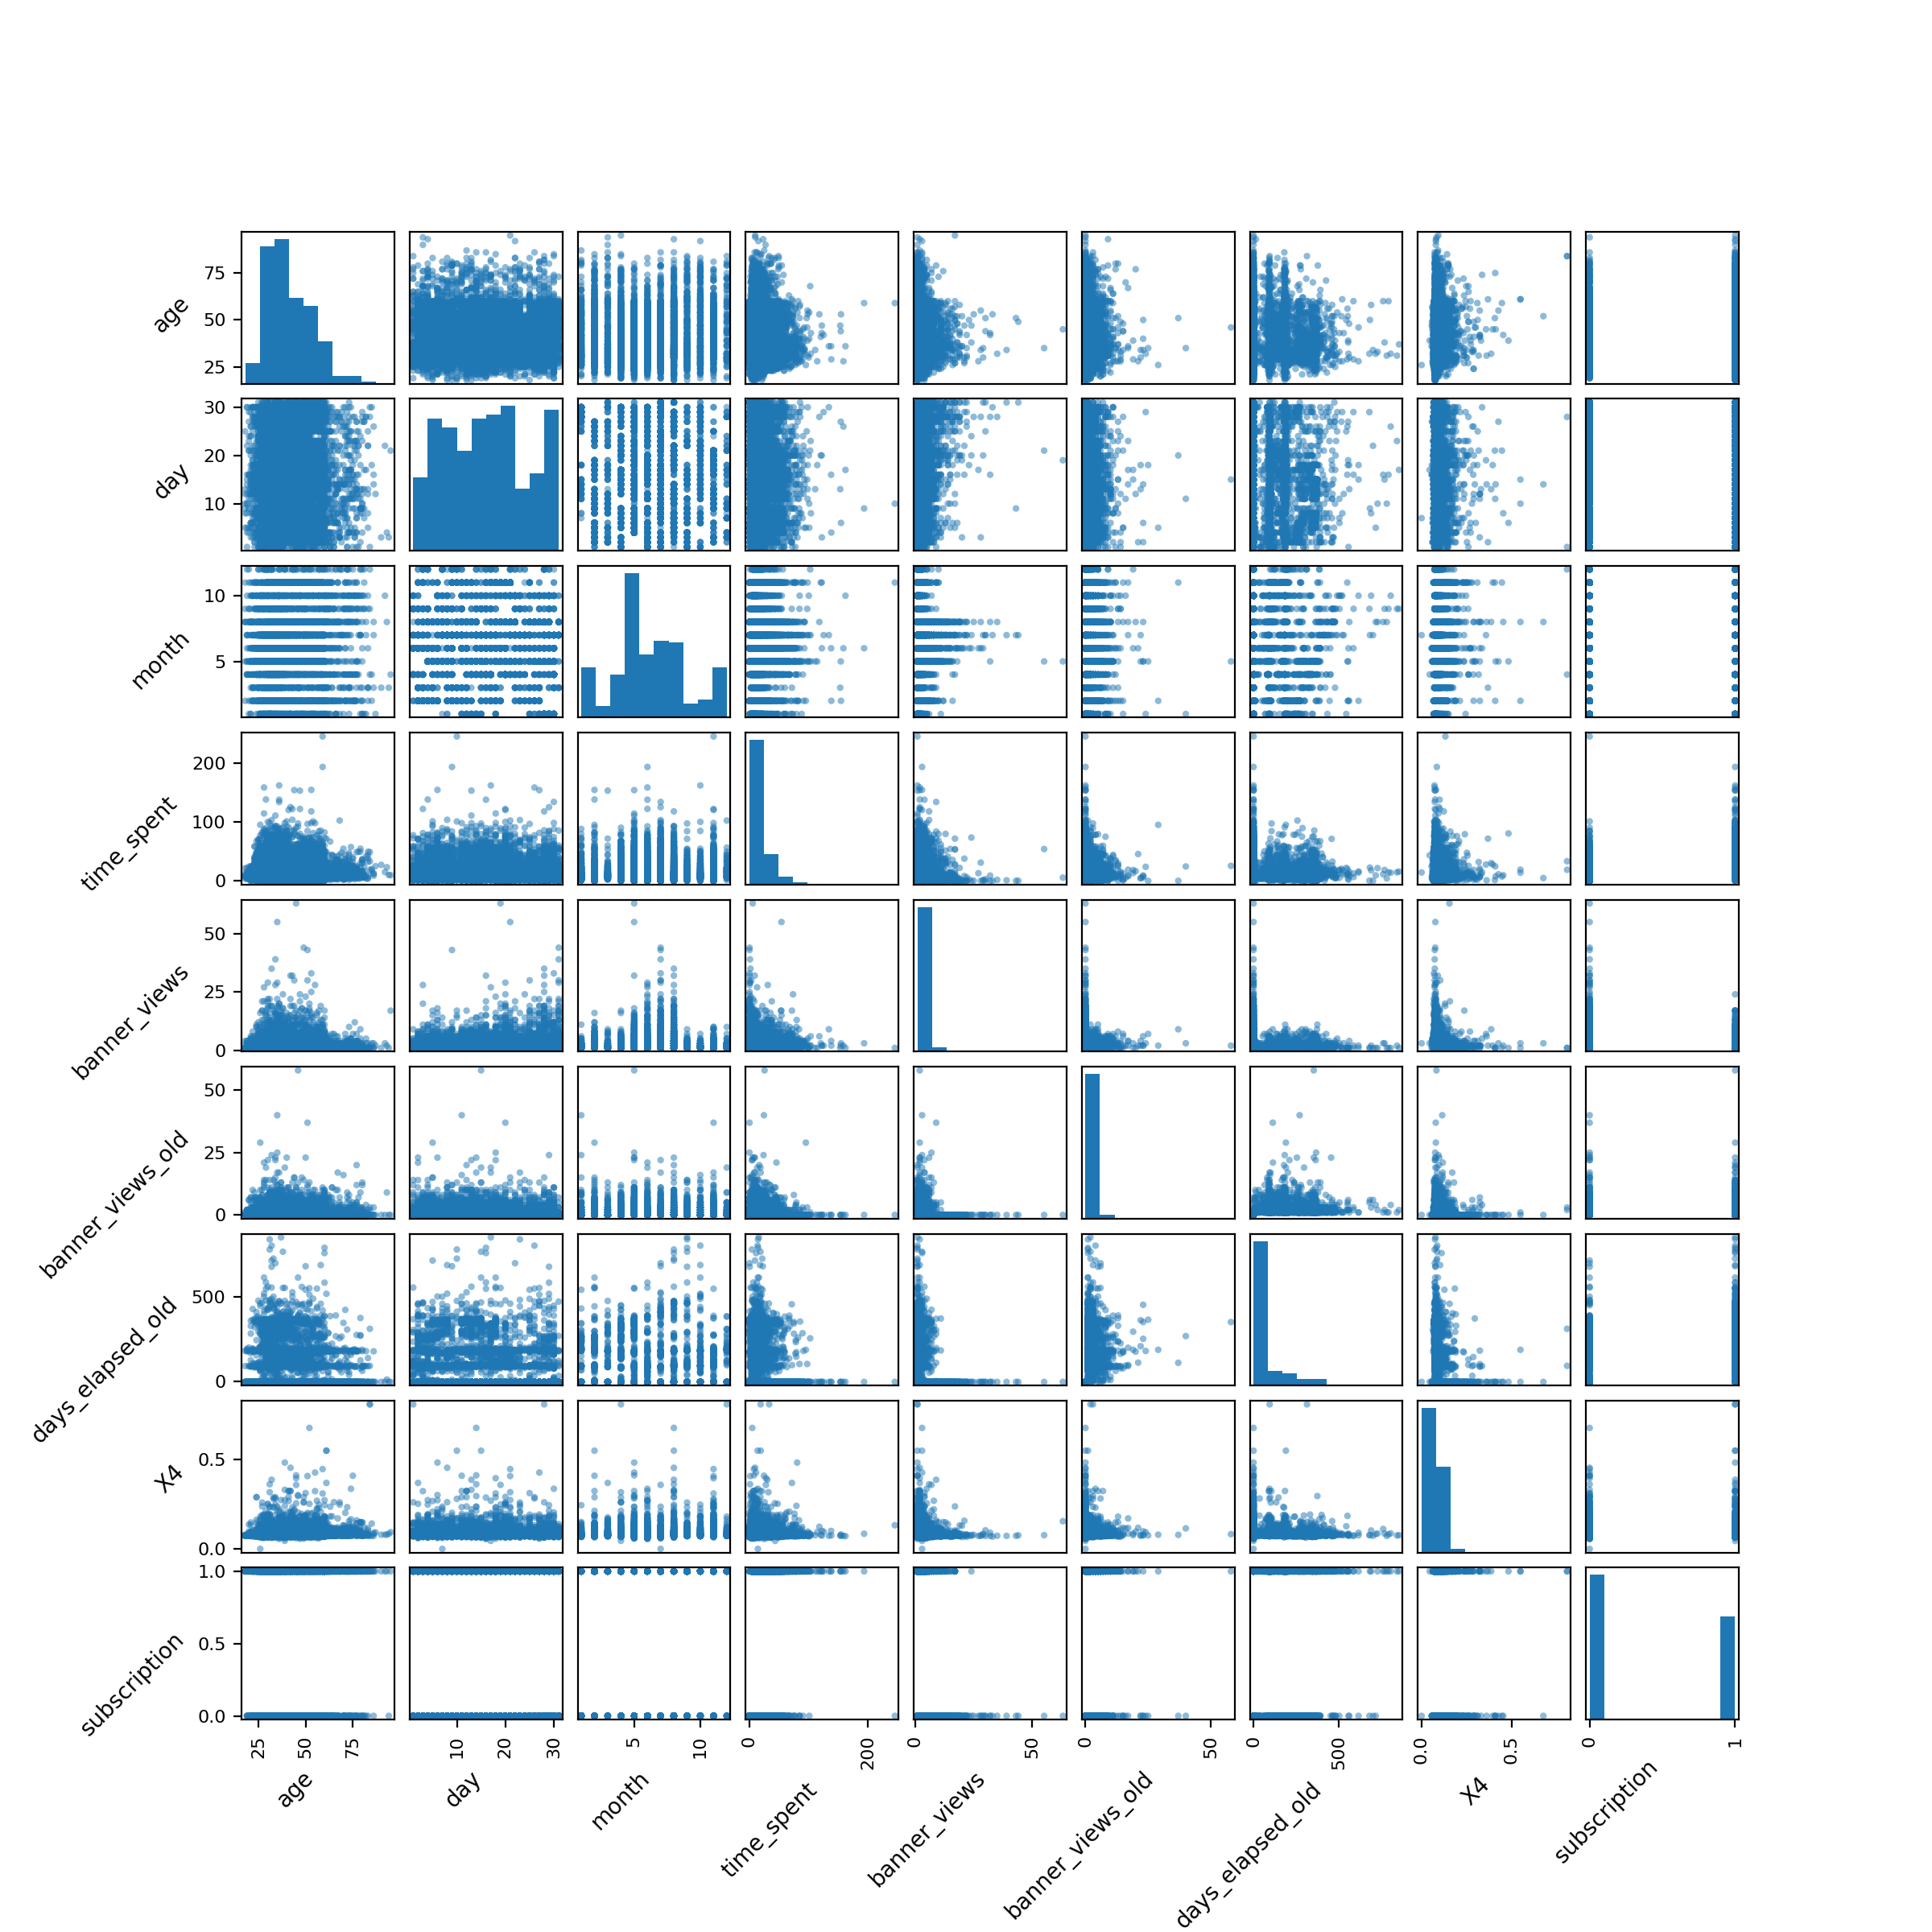

In [10]:
# Select columns to include in the scatterplot matrix (excluding 'X1', 'X2', and `X3`) for TRAINING
included_columns = [col for col in campaign_ad.columns if col not in ['X1', 'X2', 'X3']]

# Create scatter matrix plot with selected columns
scatter_matrix = pd.plotting.scatter_matrix(campaign_ad[included_columns], figsize=(12, 12))

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.1, wspace=0.1)

# Rotate x-axis labels by 45 degrees
for ax in scatter_matrix.flatten():
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(45)
    ax.xaxis.label.set_ha('right')
    ax.yaxis.label.set_ha('right')

# Display the plot
plt.show()


In [11]:
campaign_ad_test = pd.read_csv("MLUnige2023_subscriptions_test.csv", index_col="Id")

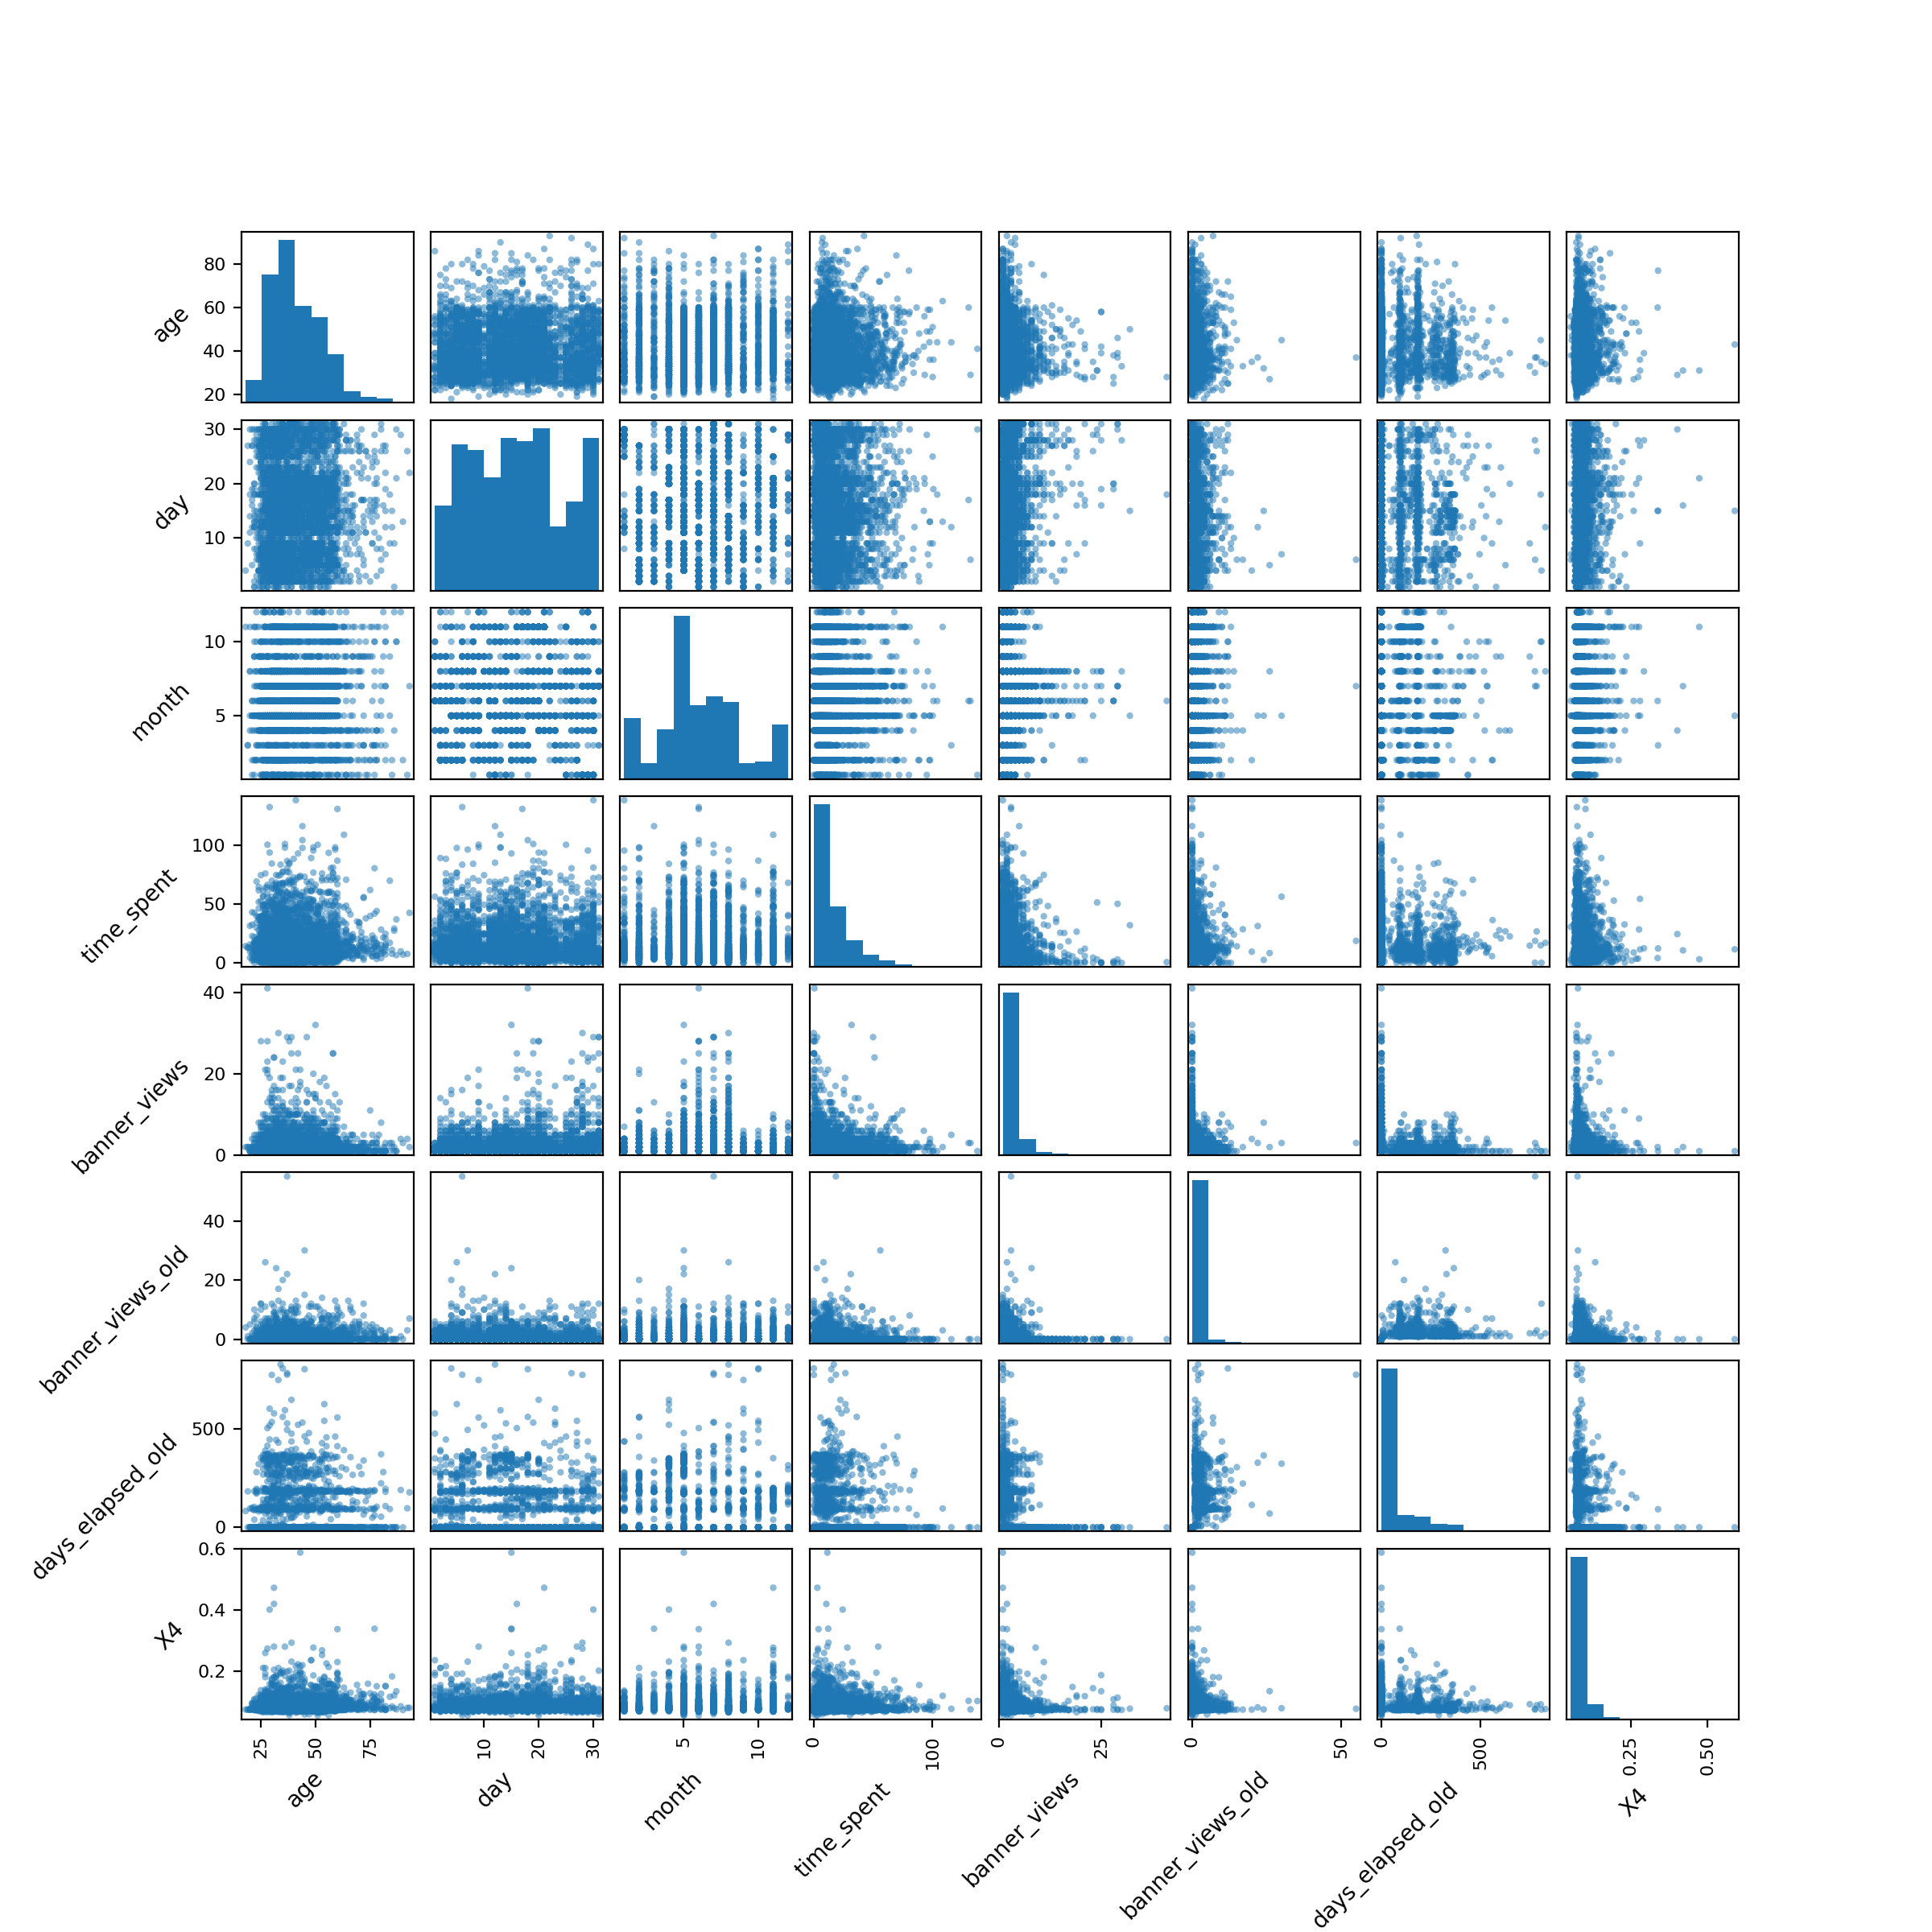

In [12]:
# Select columns to include in the scatterplot matrix (excluding 'X1', 'X2', and `X3`) for TEST
included_columns = [col for col in campaign_ad_test.columns if col not in ['X1', 'X2', 'X3']]

# Create scatter matrix plot with selected columns
scatter_matrix = pd.plotting.scatter_matrix(campaign_ad_test[included_columns], figsize=(12, 12))

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.1, wspace=0.1)

# Rotate x-axis labels by 45 degrees
for ax in scatter_matrix.flatten():
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(45)
    ax.xaxis.label.set_ha('right')
    ax.yaxis.label.set_ha('right')

# Display the plot
plt.show()

Between the training and test scatterplots, there are three variables, `time_spent`, `banner_views`, and `X4` that seem to have a similiar distribution. In the test data though, it appears to have more or less observations within the second and third bins as the data seems to be dispeared differently. 

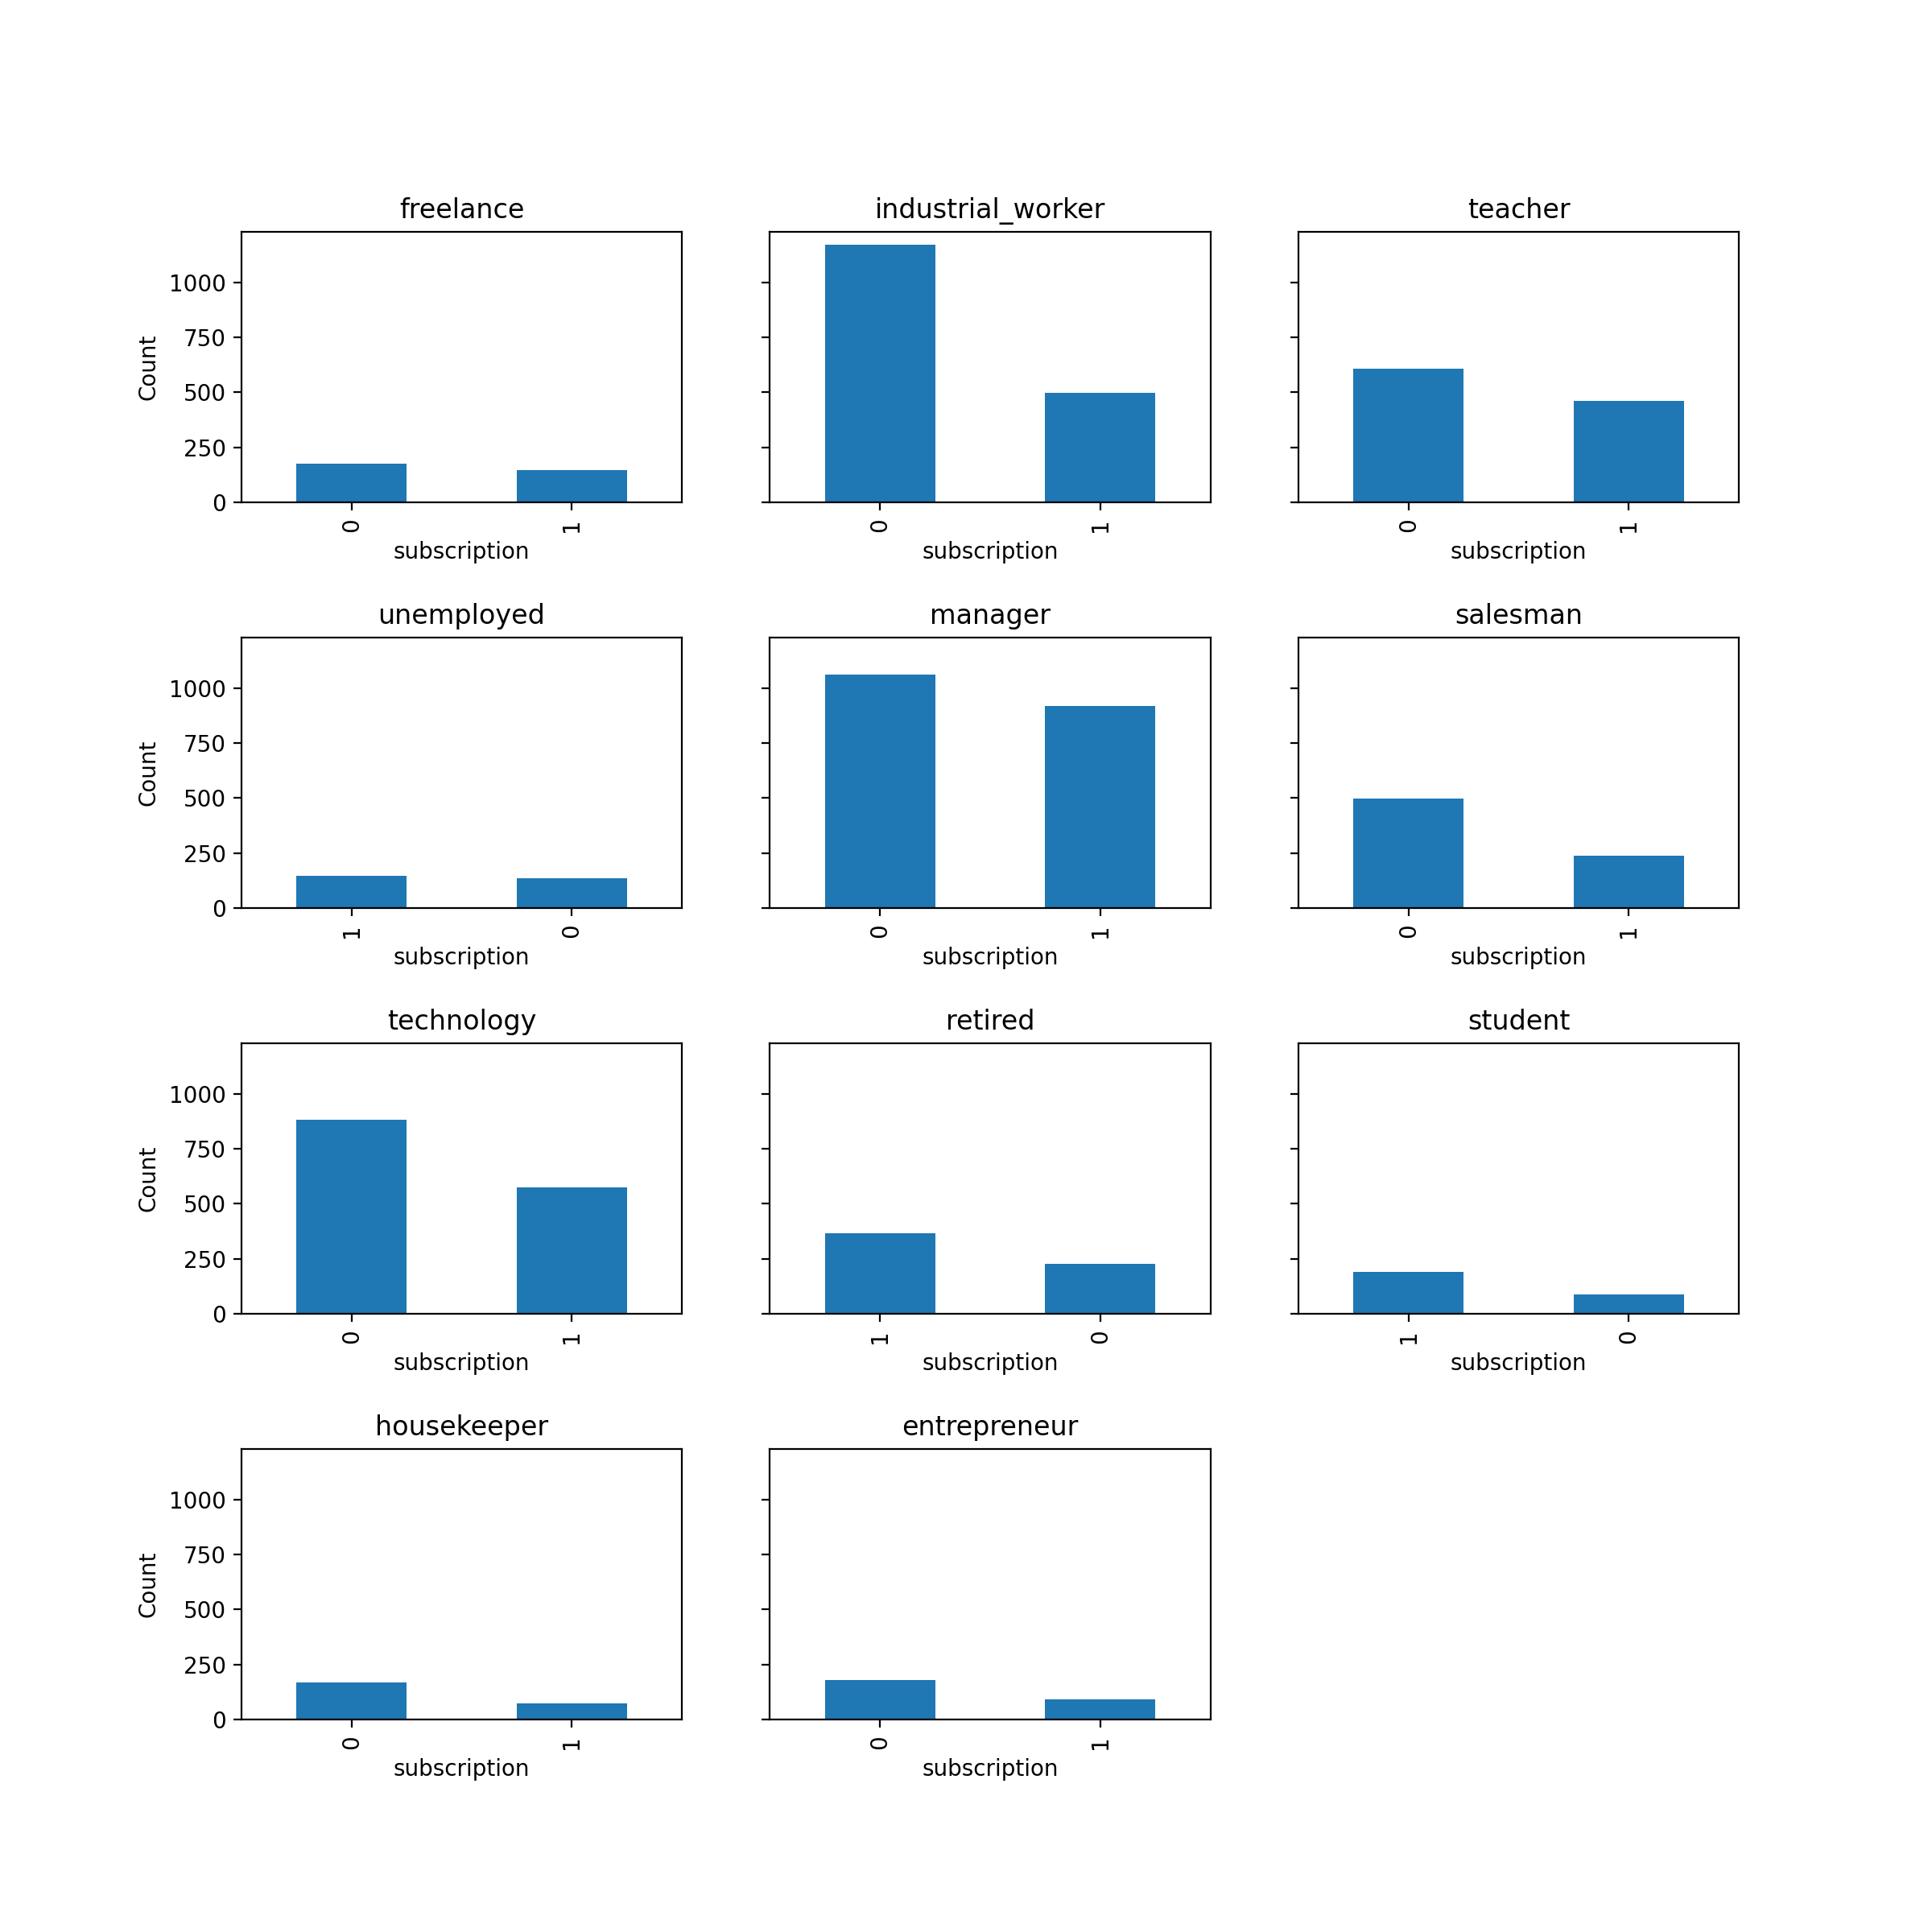

In [13]:
import math

# Get unique job categories
job_categories = campaign_ad['job'].unique()

# Determine the number of columns and rows for subplots
num_categories = len(job_categories)
num_columns = math.ceil(num_categories / 4)
num_rows = math.ceil(num_categories / num_columns)

# Create subplots
fig, axs = plt.subplots(num_rows, num_columns, figsize=(12, 12), sharey=True)

# Flatten the axs array to simplify indexing
axs = axs.flatten()

# Iterate over job categories and create bar plot for each category
for i, job_category in enumerate(job_categories):
    ax = axs[i]

    # Check if there are any records for the current job category
    if job_category in campaign_ad['job'].values:
        subset = campaign_ad[campaign_ad['job'] == job_category]
        subset['subscription'].value_counts().plot(kind='bar', ax=ax)

        ax.set_title(job_category)
        ax.set_xlabel('subscription')
        ax.set_ylabel('Count')
    else:
        # Remove the empty subplot
        fig.delaxes(ax)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Display the plot
plt.show()

Within the 11 levels, there are several that follow a similiar pattern. If feature engineering is utilized, we would combine these elements together based on their distribution regarding `subscription`.
1. `entrepreneur`, `housekeeper`, `industrial_worker`, and `salesman`

2. `freelance`, `manager`, and `na` (Later in variable selection, this is relevant because `manager` and `na` follow the same distribution, and `manager` has the most observations)

3. `teacher` and `technology`

4. `retired`

5. `student`

6. `unemployed`

Therefore, we reduce the parameters from 11 to 6. \

*Note*: Depending on how additional expertise, `retired` and `student` could possibly be considered under one parameter but since we do not know the background information of this data set, they will continue to be separate.

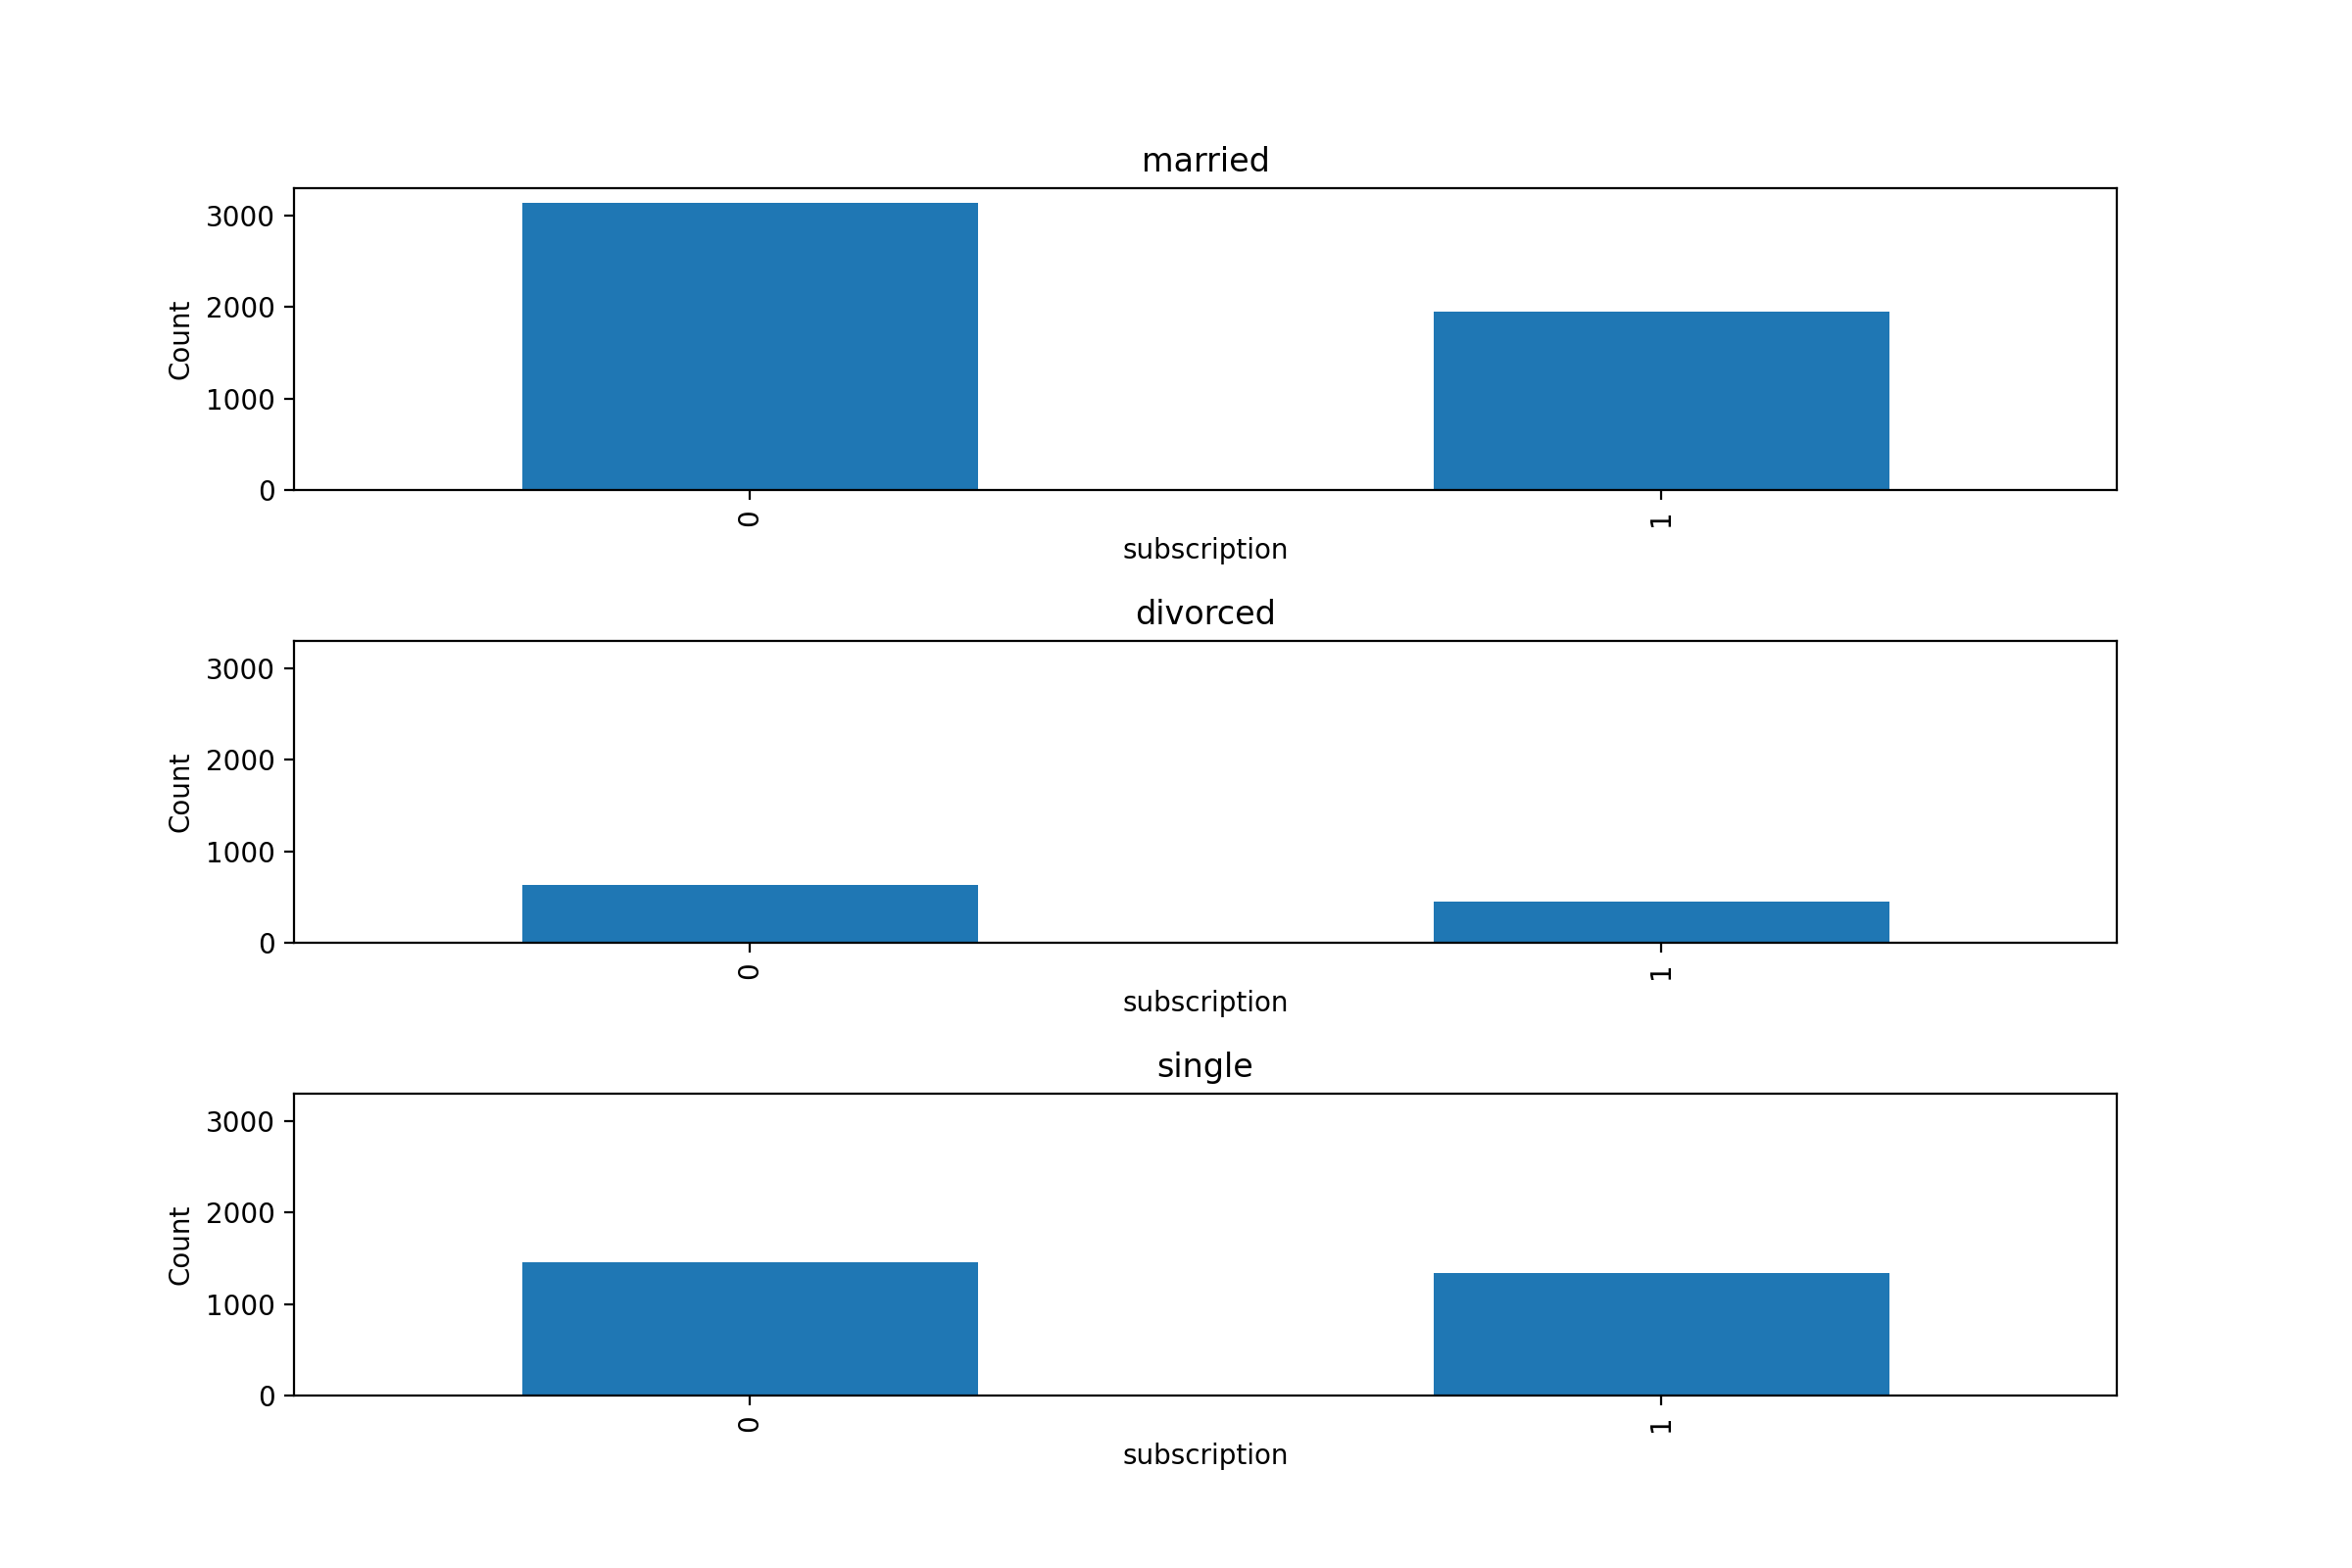

In [14]:
# Get unique marital categories
marital_categories = campaign_ad['marital'].unique()

# Determine the number of columns and rows for subplots
num_categories = len(marital_categories)
num_columns = math.ceil(num_categories / 4)
num_rows = math.ceil(num_categories / num_columns)

# Create subplots
fig, axs = plt.subplots(num_rows, num_columns, figsize=(12, 8), sharey=True)

# Flatten the axs array to simplify indexing
axs = axs.flatten()

# Iterate over job categories and create bar plot for each category
for i, marital_category in enumerate(marital_categories):
    ax = axs[i]

    # Check if there are any records for the current job category
    if marital_category in campaign_ad['marital'].values:
        subset = campaign_ad[campaign_ad['marital'] == marital_category]
        subset['subscription'].value_counts().plot(kind='bar', ax=ax)

        ax.set_title(marital_category)
        ax.set_xlabel('subscription')
        ax.set_ylabel('Count')
    else:
        # Remove the empty subplot
        fig.delaxes(ax)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Display the plot
plt.show()

Between these three levels, combining them into less parameters does not seem worthwhile due to their different distributions.

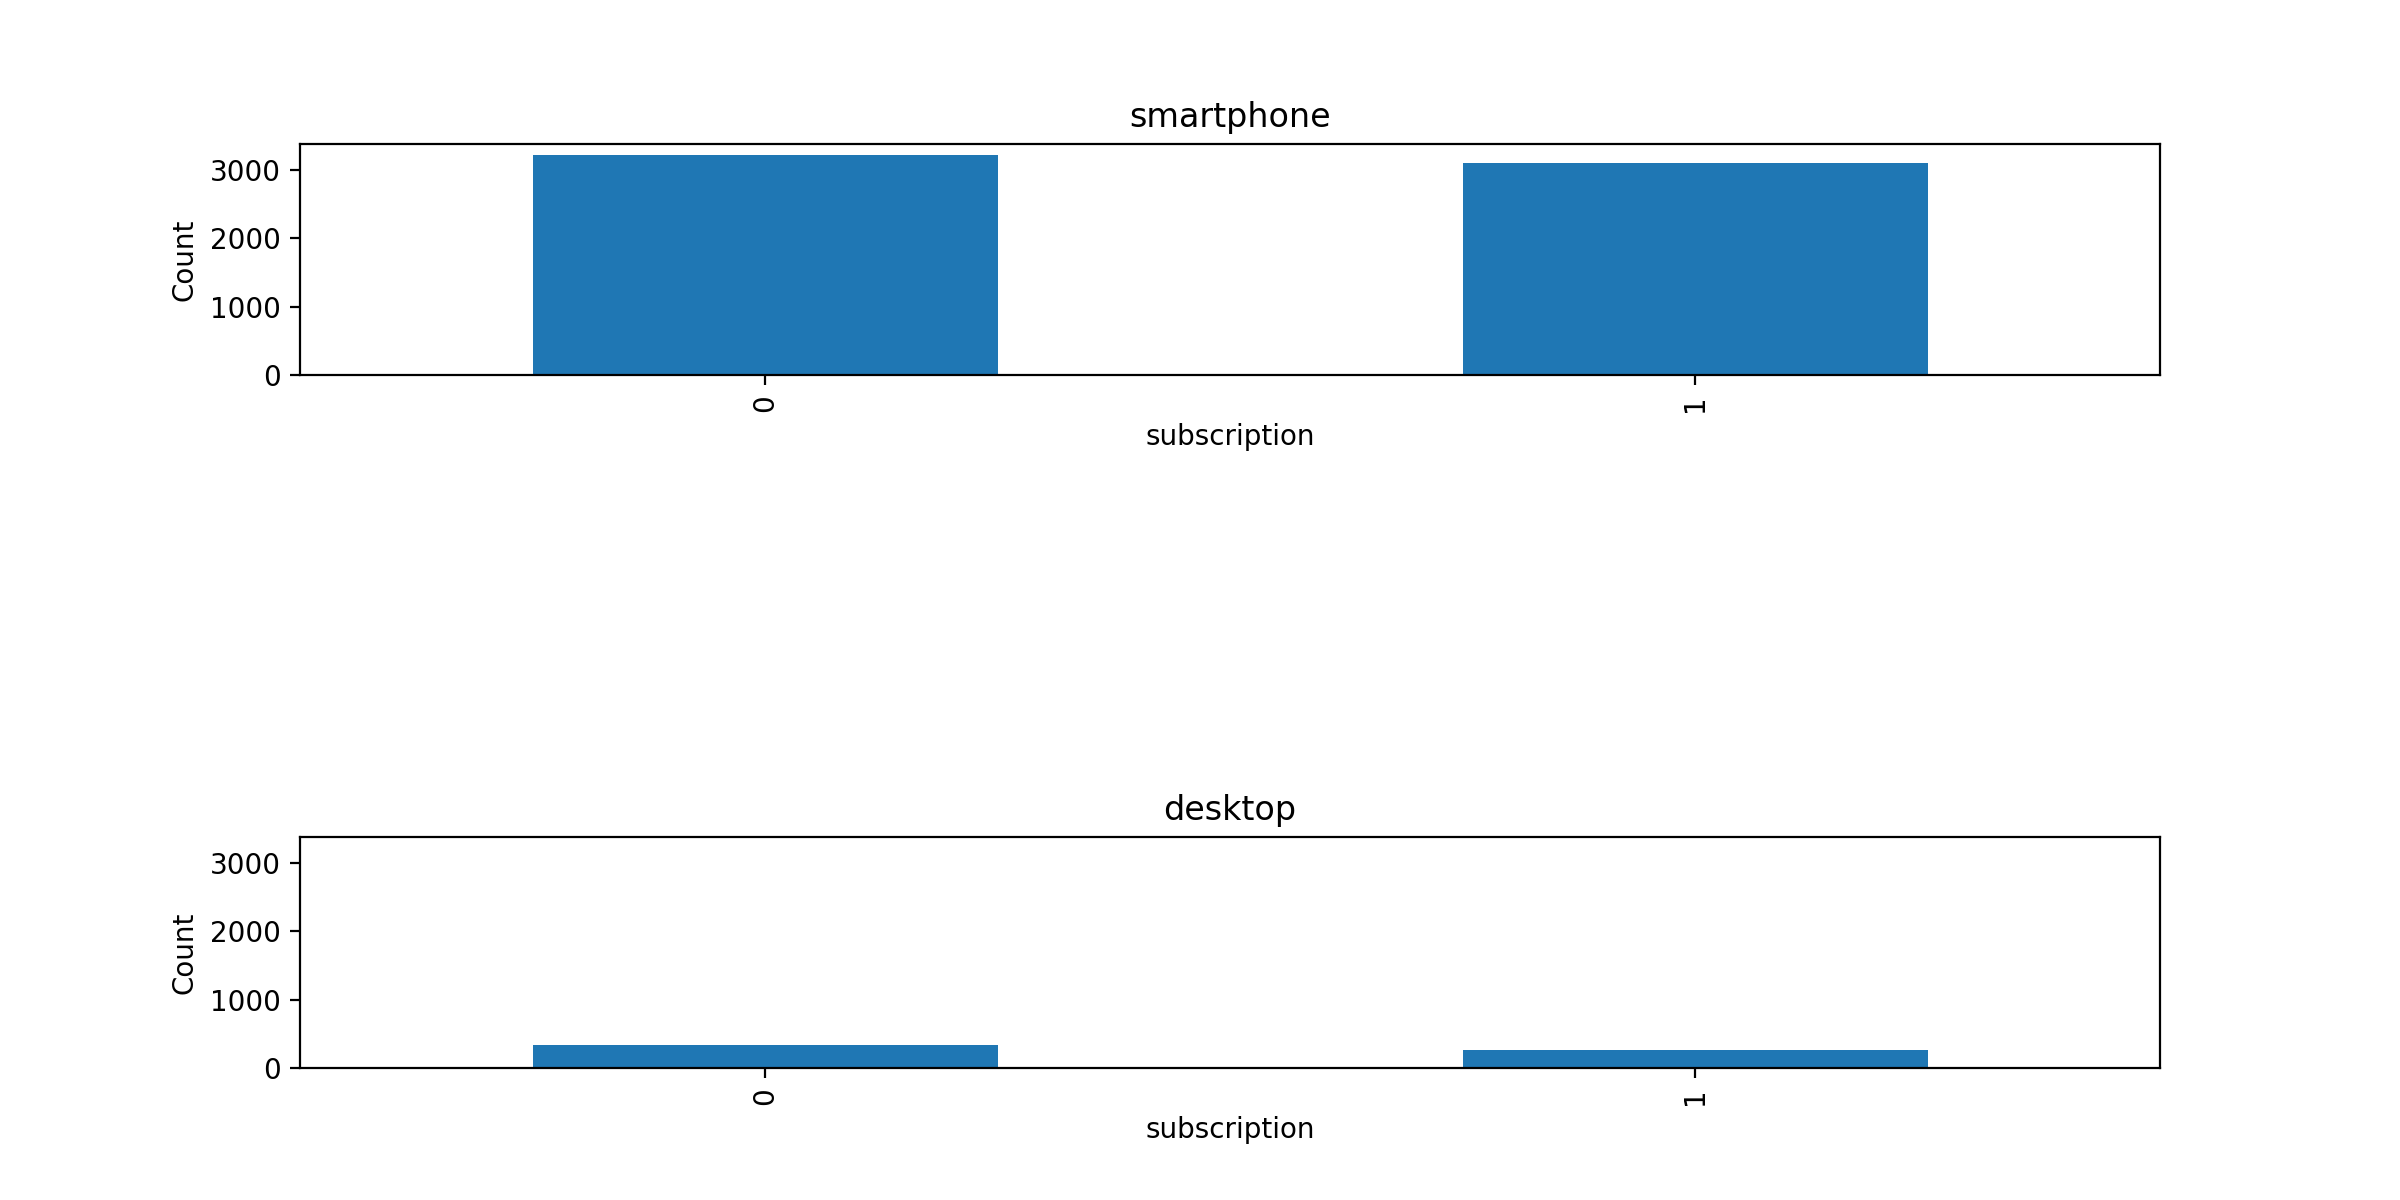

In [15]:
# Get unique device categories
device_categories = campaign_ad['device'].unique()

# Determine the number of columns and rows for subplots
num_categories = len(device_categories)
num_columns = math.ceil(num_categories / 4)
num_rows = math.ceil(num_categories / num_columns)

# Create subplots
fig, axs = plt.subplots(num_rows, num_columns, figsize=(12, 6), sharey=True)

# Flatten the axs array to simplify indexing
axs = axs.flatten()

# Iterate over job categories and create bar plot for each category
for i, device_category in enumerate(device_categories):
    ax = axs[i]

    # Check if there are any records for the current job category
    if device_category in campaign_ad['device'].values:
        subset = campaign_ad[campaign_ad['device'] == device_category]
        subset['subscription'].value_counts().plot(kind='bar', ax=ax)

        ax.set_title(device_category)
        ax.set_xlabel('subscription')
        ax.set_ylabel('Count')
    else:
        # Remove the empty subplot
        fig.delaxes(ax)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Display the plot
plt.show()

`device` will stay as is. This predictor will be reviewed again later in **Varible Selection** since it has the least amount of levels that could indicate an approach to use a model to predict its missing values. 

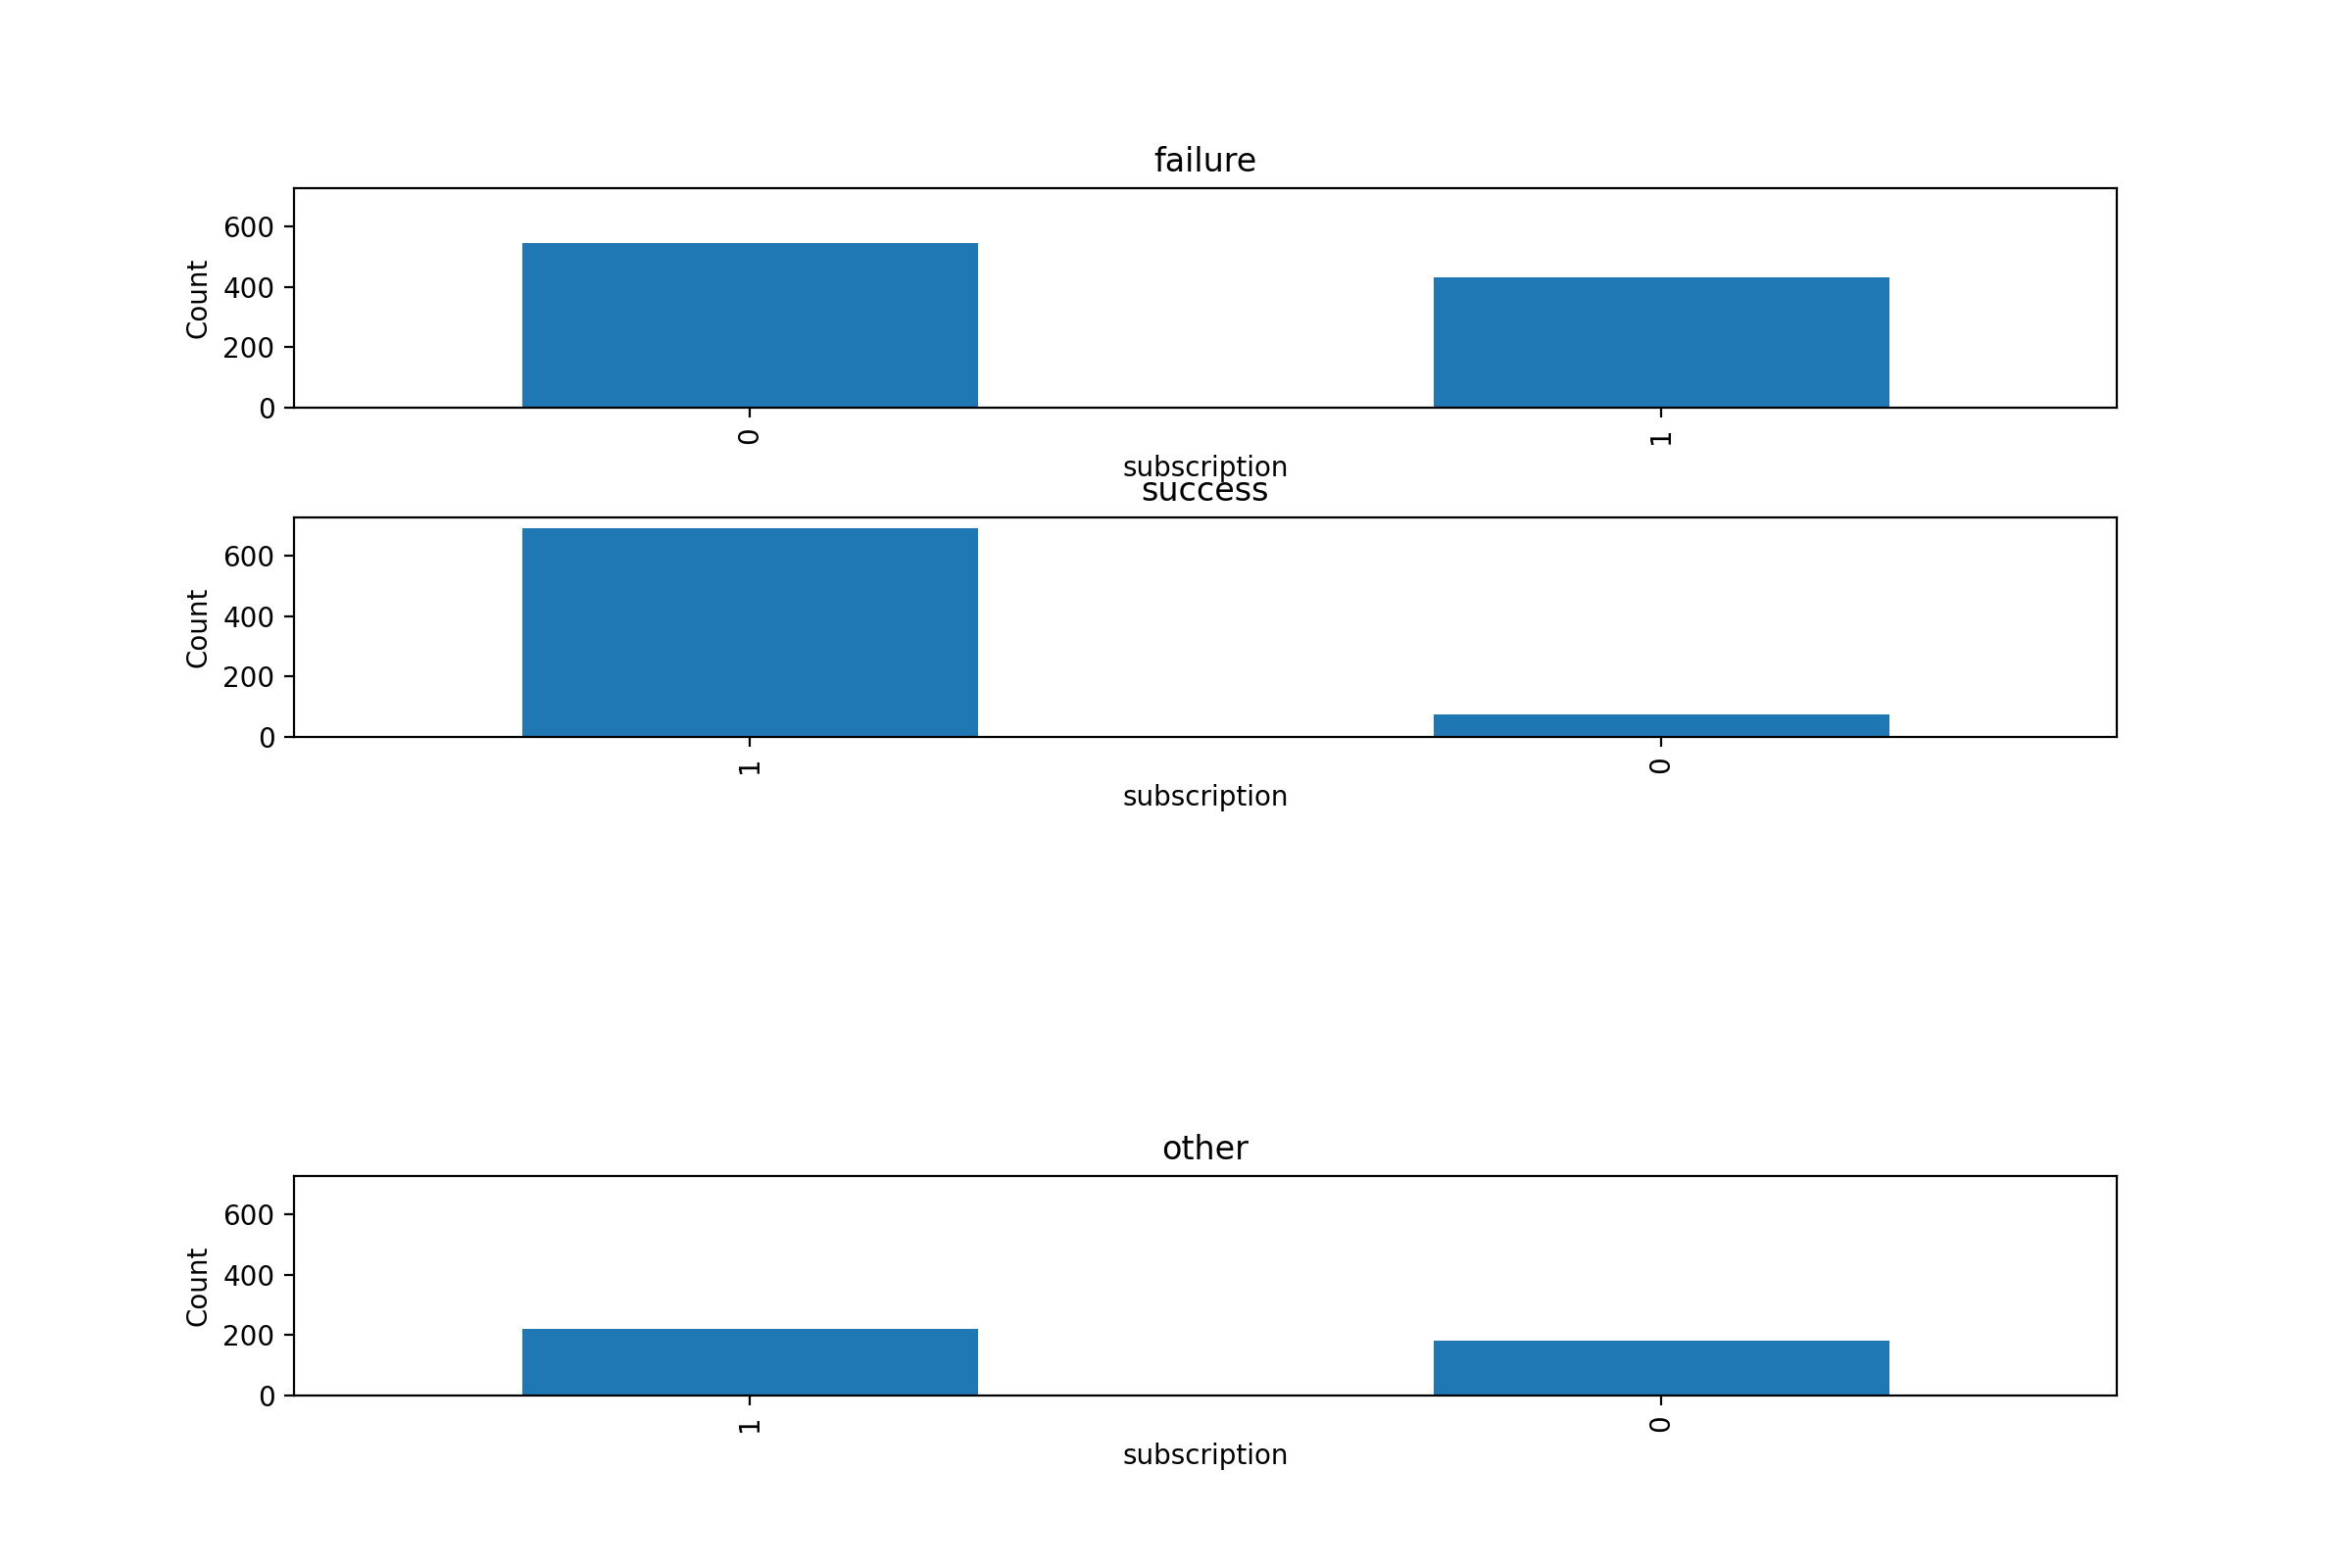

In [16]:
# Get unique outcome_old categories
outcome_old_categories = campaign_ad['outcome_old'].unique()

# Determine the number of columns and rows for subplots
num_categories = len(outcome_old_categories)
num_columns = math.ceil(num_categories / 4)
num_rows = math.ceil(num_categories / num_columns)

# Create subplots
fig, axs = plt.subplots(num_rows, num_columns, figsize=(12, 8), sharey=True)

# Flatten the axs array to simplify indexing
axs = axs.flatten()

# Iterate over job categories and create bar plot for each category
for i, outcome_old_category in enumerate(outcome_old_categories):
    ax = axs[i]

    # Check if there are any records for the current job category
    if outcome_old_category in campaign_ad['outcome_old'].values:
        subset = campaign_ad[campaign_ad['outcome_old'] == outcome_old_category]
        subset['subscription'].value_counts().plot(kind='bar', ax=ax)

        ax.set_title(outcome_old_category)
        ax.set_xlabel('subscription')
        ax.set_ylabel('Count')
    else:
        # Remove the empty subplot
        fig.delaxes(ax)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Display the plot
plt.show()

There appears to be a empty spot between `success` and `other`, which is actually `na`. Once again, we would not consider combining these levels as they do not have similiar distributions. 

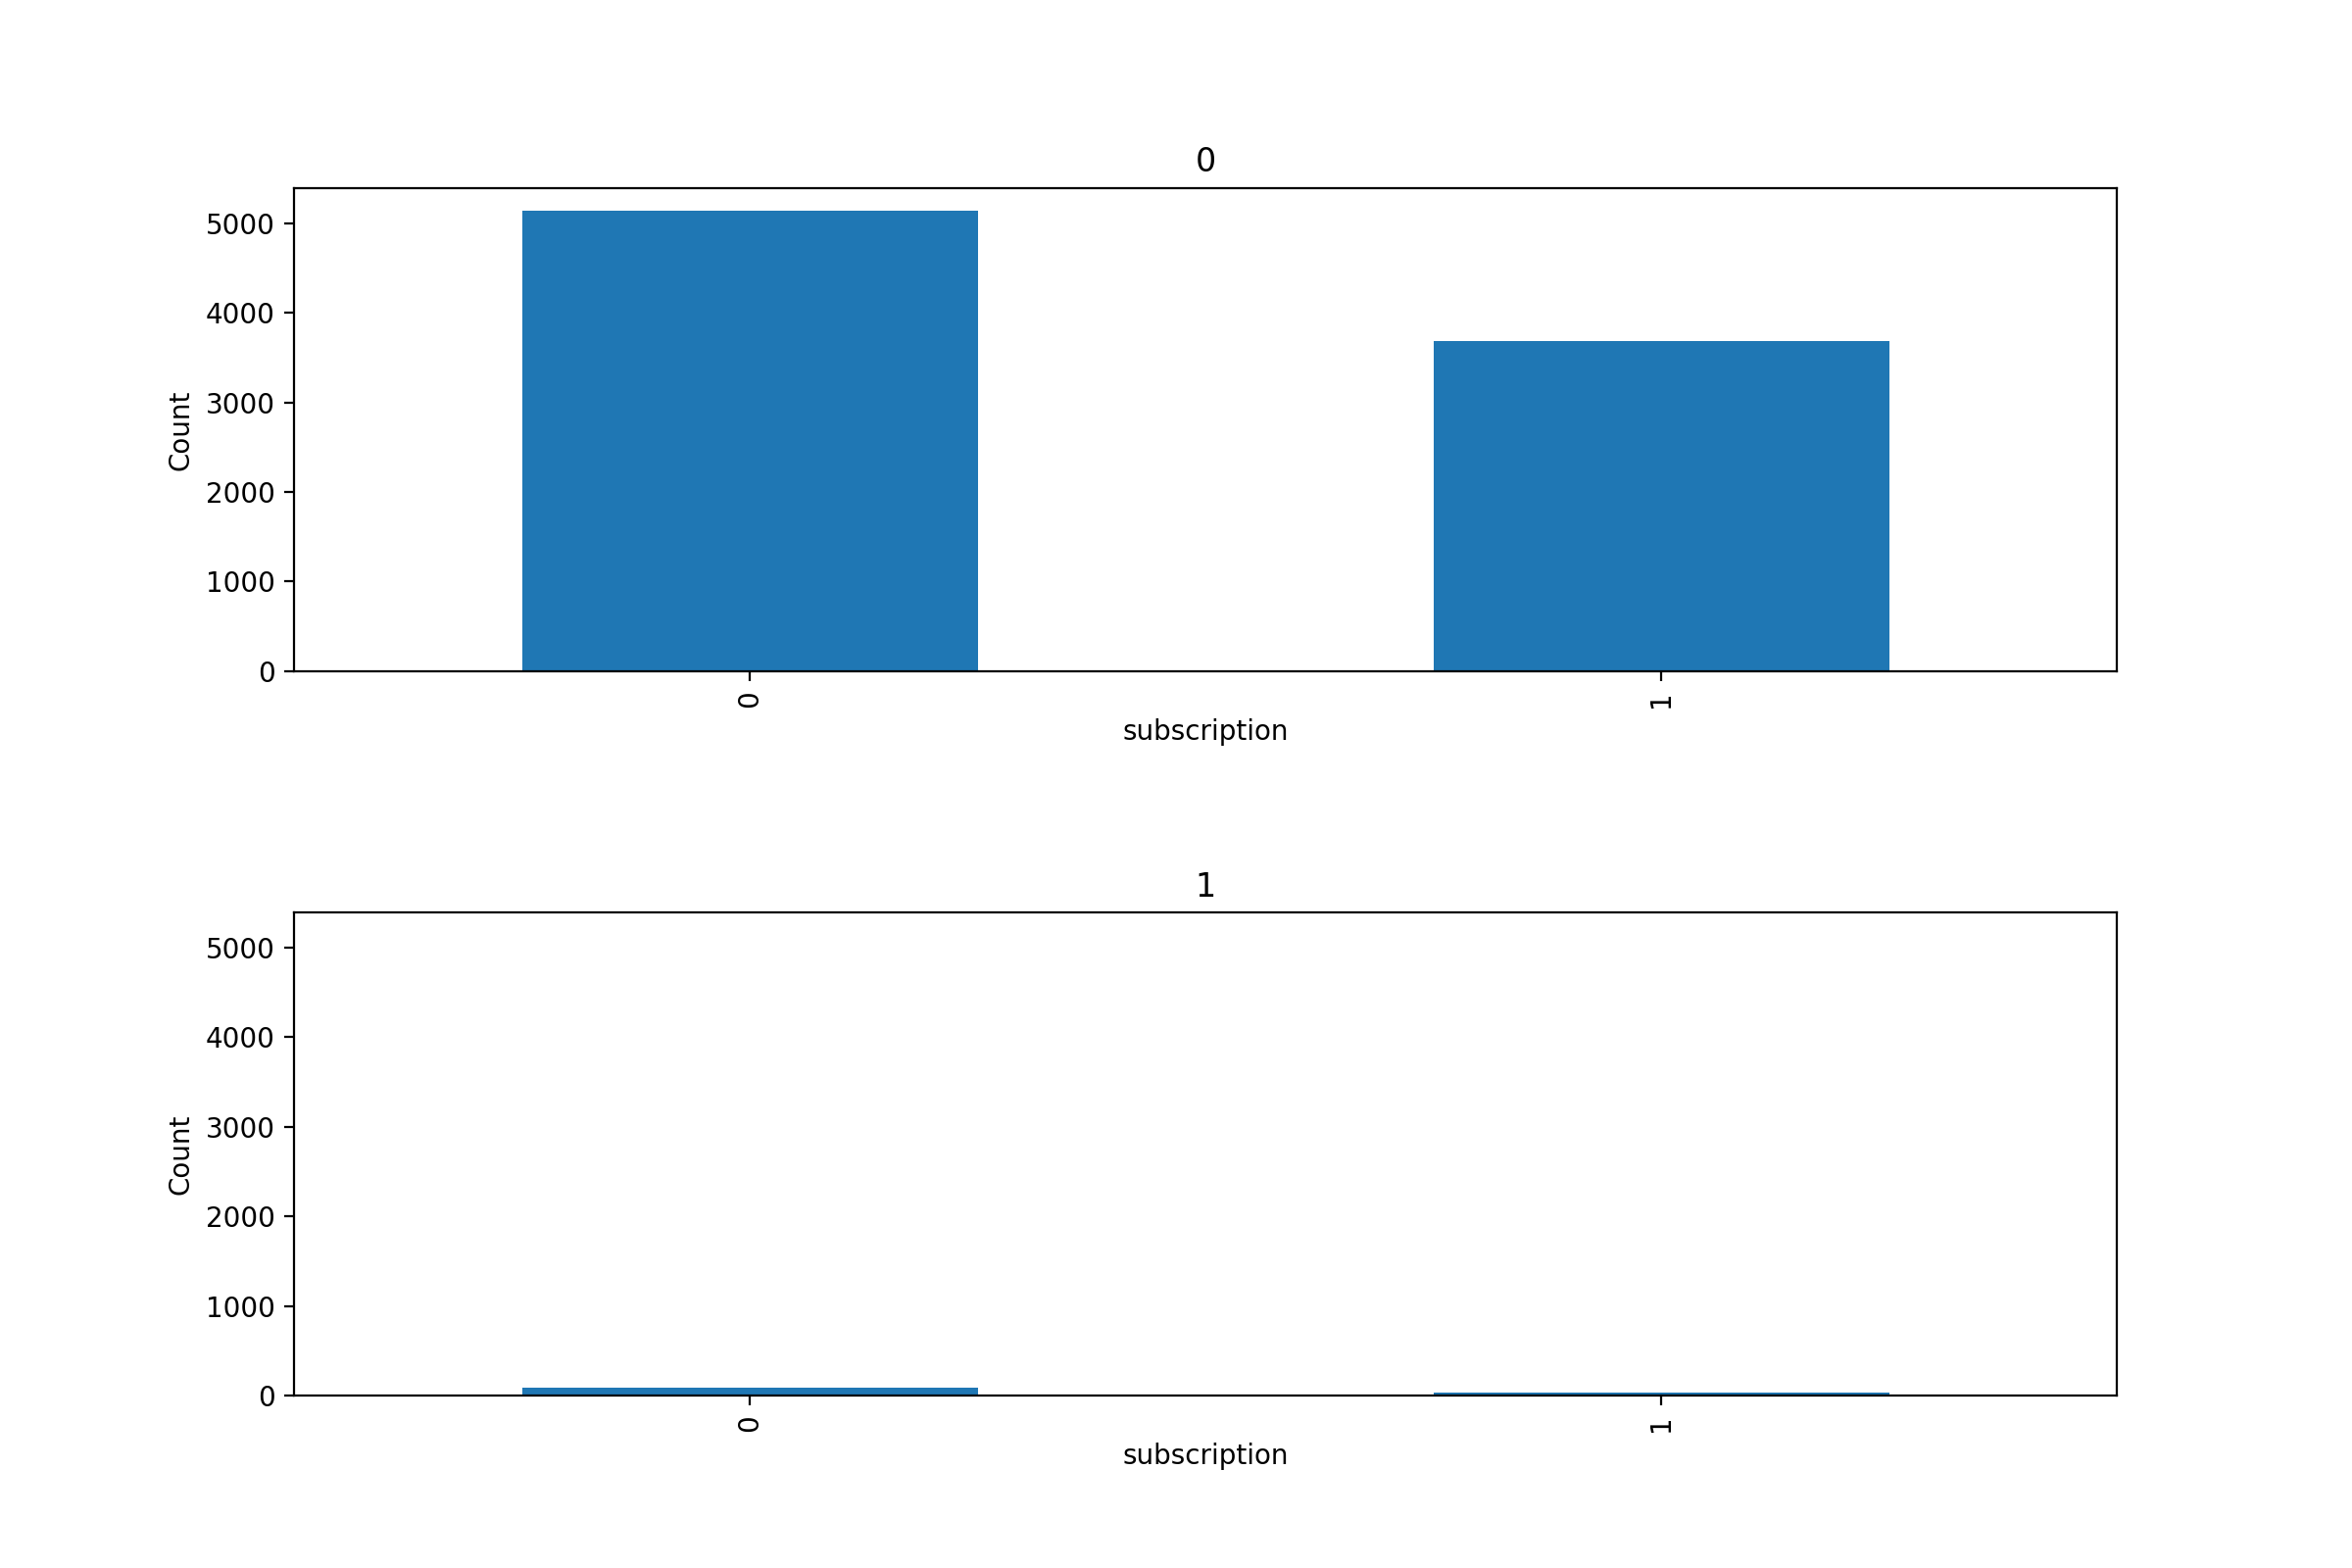

In [17]:
# Get unique X1 categories
X1_categories = campaign_ad['X1'].unique()

# Determine the number of columns and rows for subplots
num_categories = len(X1_categories)
num_columns = math.ceil(num_categories / 4)
num_rows = math.ceil(num_categories / num_columns)

# Create subplots
fig, axs = plt.subplots(num_rows, num_columns, figsize=(12, 8), sharey=True)

# Flatten the axs array to simplify indexing
axs = axs.flatten()

# Iterate over job categories and create bar plot for each category
for i, X1_category in enumerate(X1_categories):
    ax = axs[i]

    # Check if there are any records for the current job category
    if X1_category in campaign_ad['X2'].values:
        subset = campaign_ad[campaign_ad['X2'] == X1_category]
        subset['subscription'].value_counts().plot(kind='bar', ax=ax)

        ax.set_title(X1_category)
        ax.set_xlabel('subscription')
        ax.set_ylabel('Count')
    else:
        # Remove the empty subplot
        fig.delaxes(ax)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Display the plot
plt.show()

The majority of `X1` is zero. It appears that most of the observations fall under not having a subscription.

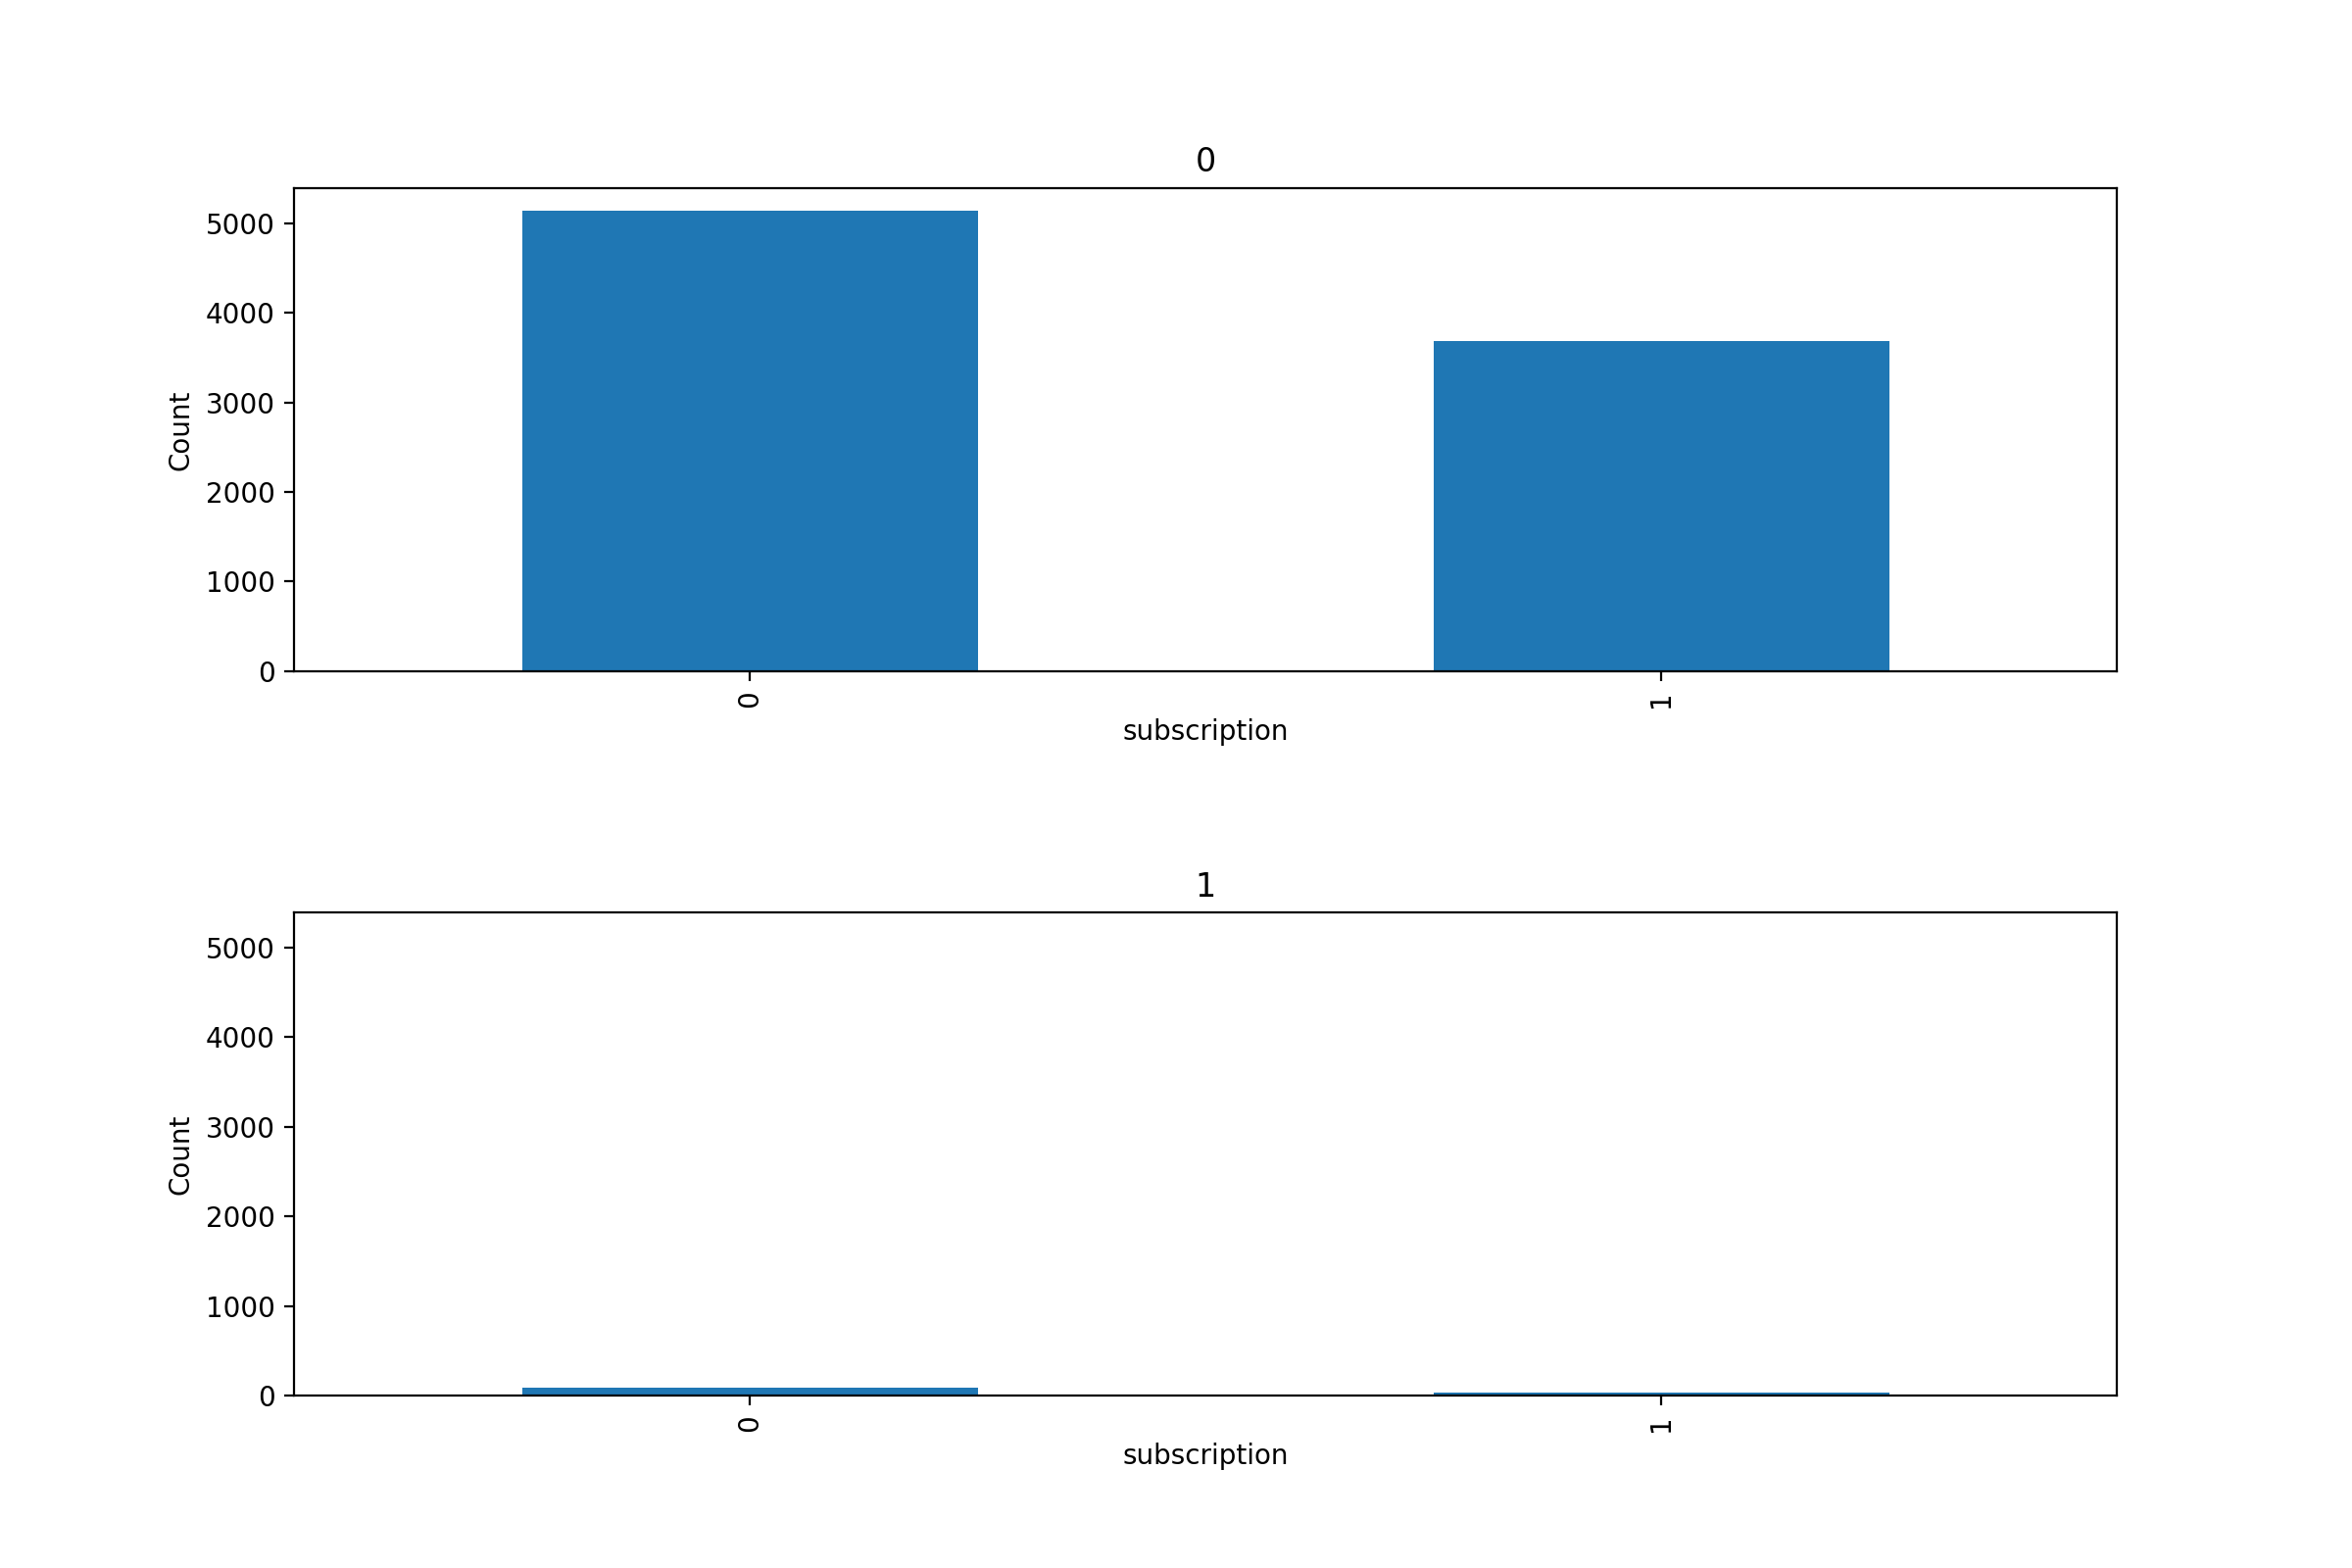

In [18]:
# Get unique X2 categories
X2_categories = campaign_ad['X2'].unique()

# Determine the number of columns and rows for subplots
num_categories = len(X2_categories)
num_columns = math.ceil(num_categories / 4)
num_rows = math.ceil(num_categories / num_columns)

# Create subplots
fig, axs = plt.subplots(num_rows, num_columns, figsize=(12, 8), sharey=True)

# Flatten the axs array to simplify indexing
axs = axs.flatten()

# Iterate over job categories and create bar plot for each category
for i, X2_category in enumerate(X2_categories):
    ax = axs[i]

    # Check if there are any records for the current job category
    if X2_category in campaign_ad['X2'].values:
        subset = campaign_ad[campaign_ad['X2'] == X2_category]
        subset['subscription'].value_counts().plot(kind='bar', ax=ax)

        ax.set_title(X2_category)
        ax.set_xlabel('subscription')
        ax.set_ylabel('Count')
    else:
        # Remove the empty subplot
        fig.delaxes(ax)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Display the plot
plt.show()

When comparing `X1` to `X2`, they have similiar patterns in that the majority of their obersvations are in class 0. Therefore, these two predictors could possibly be combined even though we are unsure of their categorical meaning.

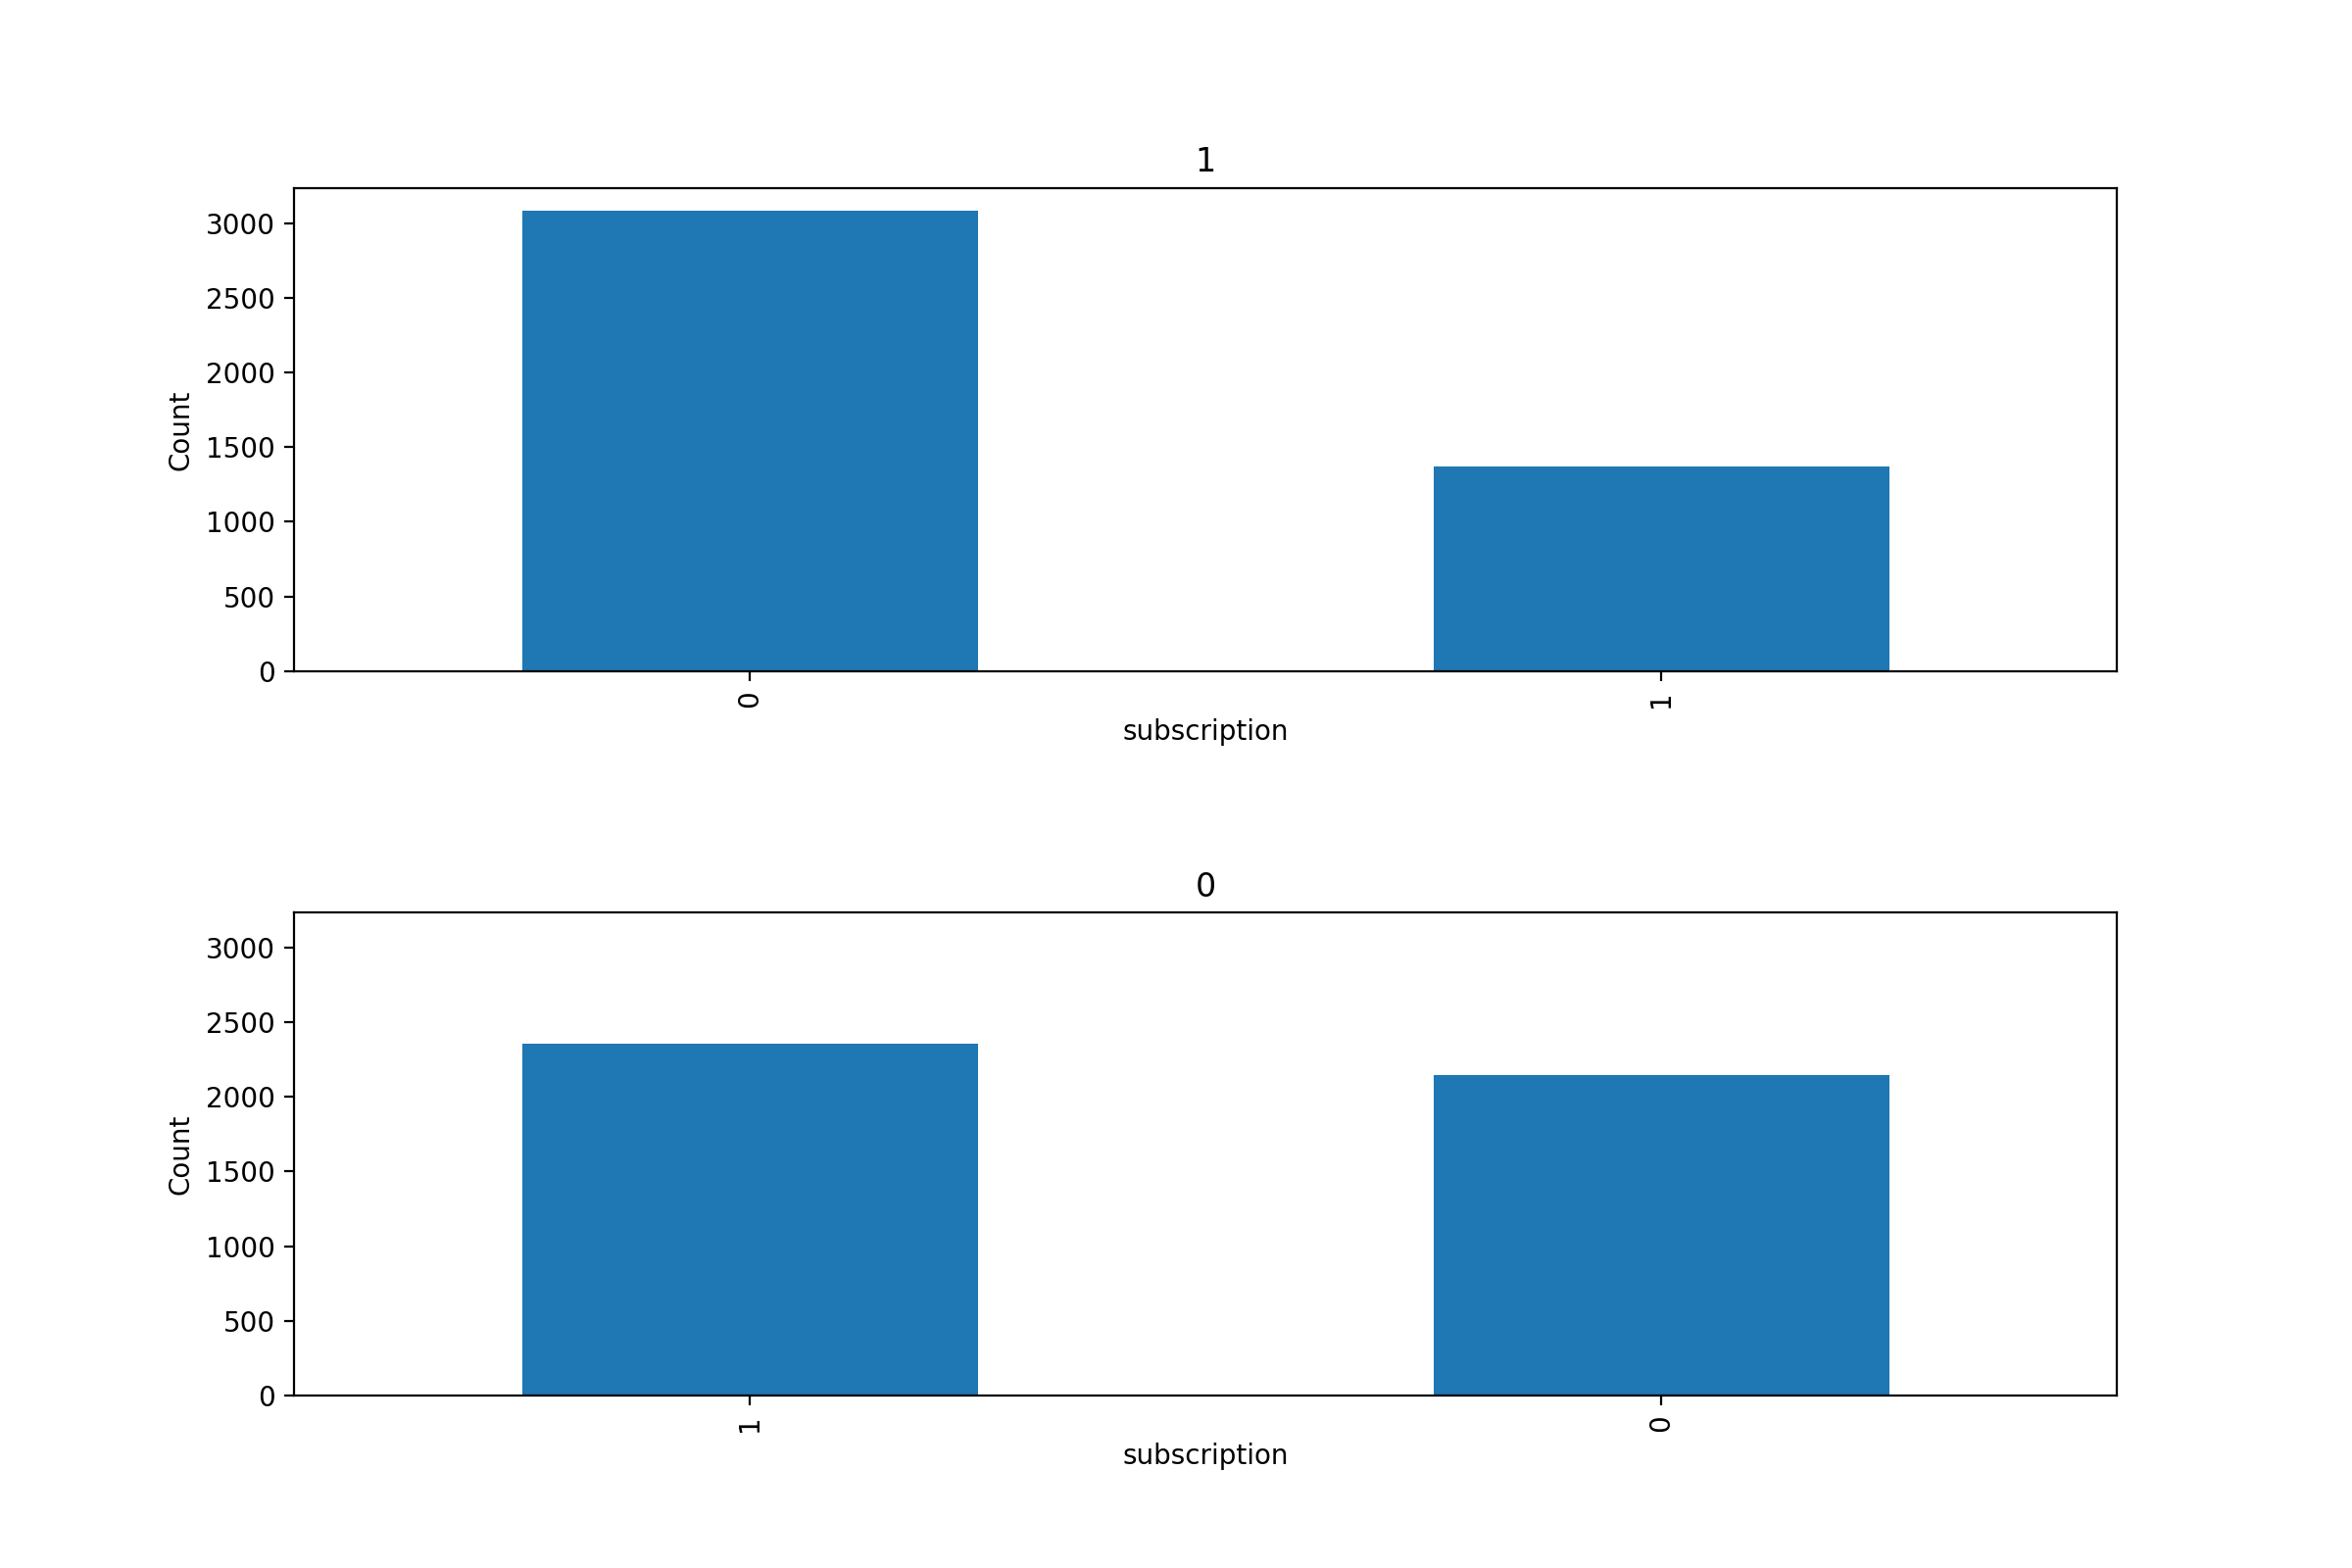

In [19]:
# Get unique X3 categories
X3_categories = campaign_ad['X3'].unique()

# Determine the number of columns and rows for subplots
num_categories = len(X3_categories)
num_columns = math.ceil(num_categories / 4)
num_rows = math.ceil(num_categories / num_columns)

# Create subplots
fig, axs = plt.subplots(num_rows, num_columns, figsize=(12, 8), sharey=True)

# Flatten the axs array to simplify indexing
axs = axs.flatten()

# Iterate over job categories and create bar plot for each category
for i, X3_category in enumerate(X3_categories):
    ax = axs[i]

    # Check if there are any records for the current job category
    if X3_category in campaign_ad['X3'].values:
        subset = campaign_ad[campaign_ad['X3'] == X3_category]
        subset['subscription'].value_counts().plot(kind='bar', ax=ax)

        ax.set_title(X3_category)
        ax.set_xlabel('subscription')
        ax.set_ylabel('Count')
    else:
        # Remove the empty subplot
        fig.delaxes(ax)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Display the plot
plt.show()

`X3` is different than the `X1` and `X2` because it appears that class 0 and 1 for the predictor are more evenly distributed. If the class for `X3` is 1, then most individuals do not have a subscription while in class 0, it is the opposite.

## Test Set

In [20]:
campaign_ad_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3837 entries, 0 to 3836
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               3837 non-null   int64  
 1   job               3837 non-null   object 
 2   marital           3837 non-null   object 
 3   education         3837 non-null   object 
 4   device            3837 non-null   object 
 5   day               3837 non-null   int64  
 6   month             3837 non-null   int64  
 7   time_spent        3837 non-null   float64
 8   banner_views      3837 non-null   int64  
 9   banner_views_old  3837 non-null   int64  
 10  days_elapsed_old  3837 non-null   int64  
 11  outcome_old       3837 non-null   object 
 12  X1                3837 non-null   int64  
 13  X2                3837 non-null   int64  
 14  X3                3837 non-null   int64  
 15  X4                3837 non-null   float64
dtypes: float64(2), int64(9), object(5)
memory usage

Although the `test set` does not contain `subscription`, we thought it would be important to review the missing data and distributions of the variables.

In [21]:
campaign_ad_test.replace('na', np.nan, inplace=True)

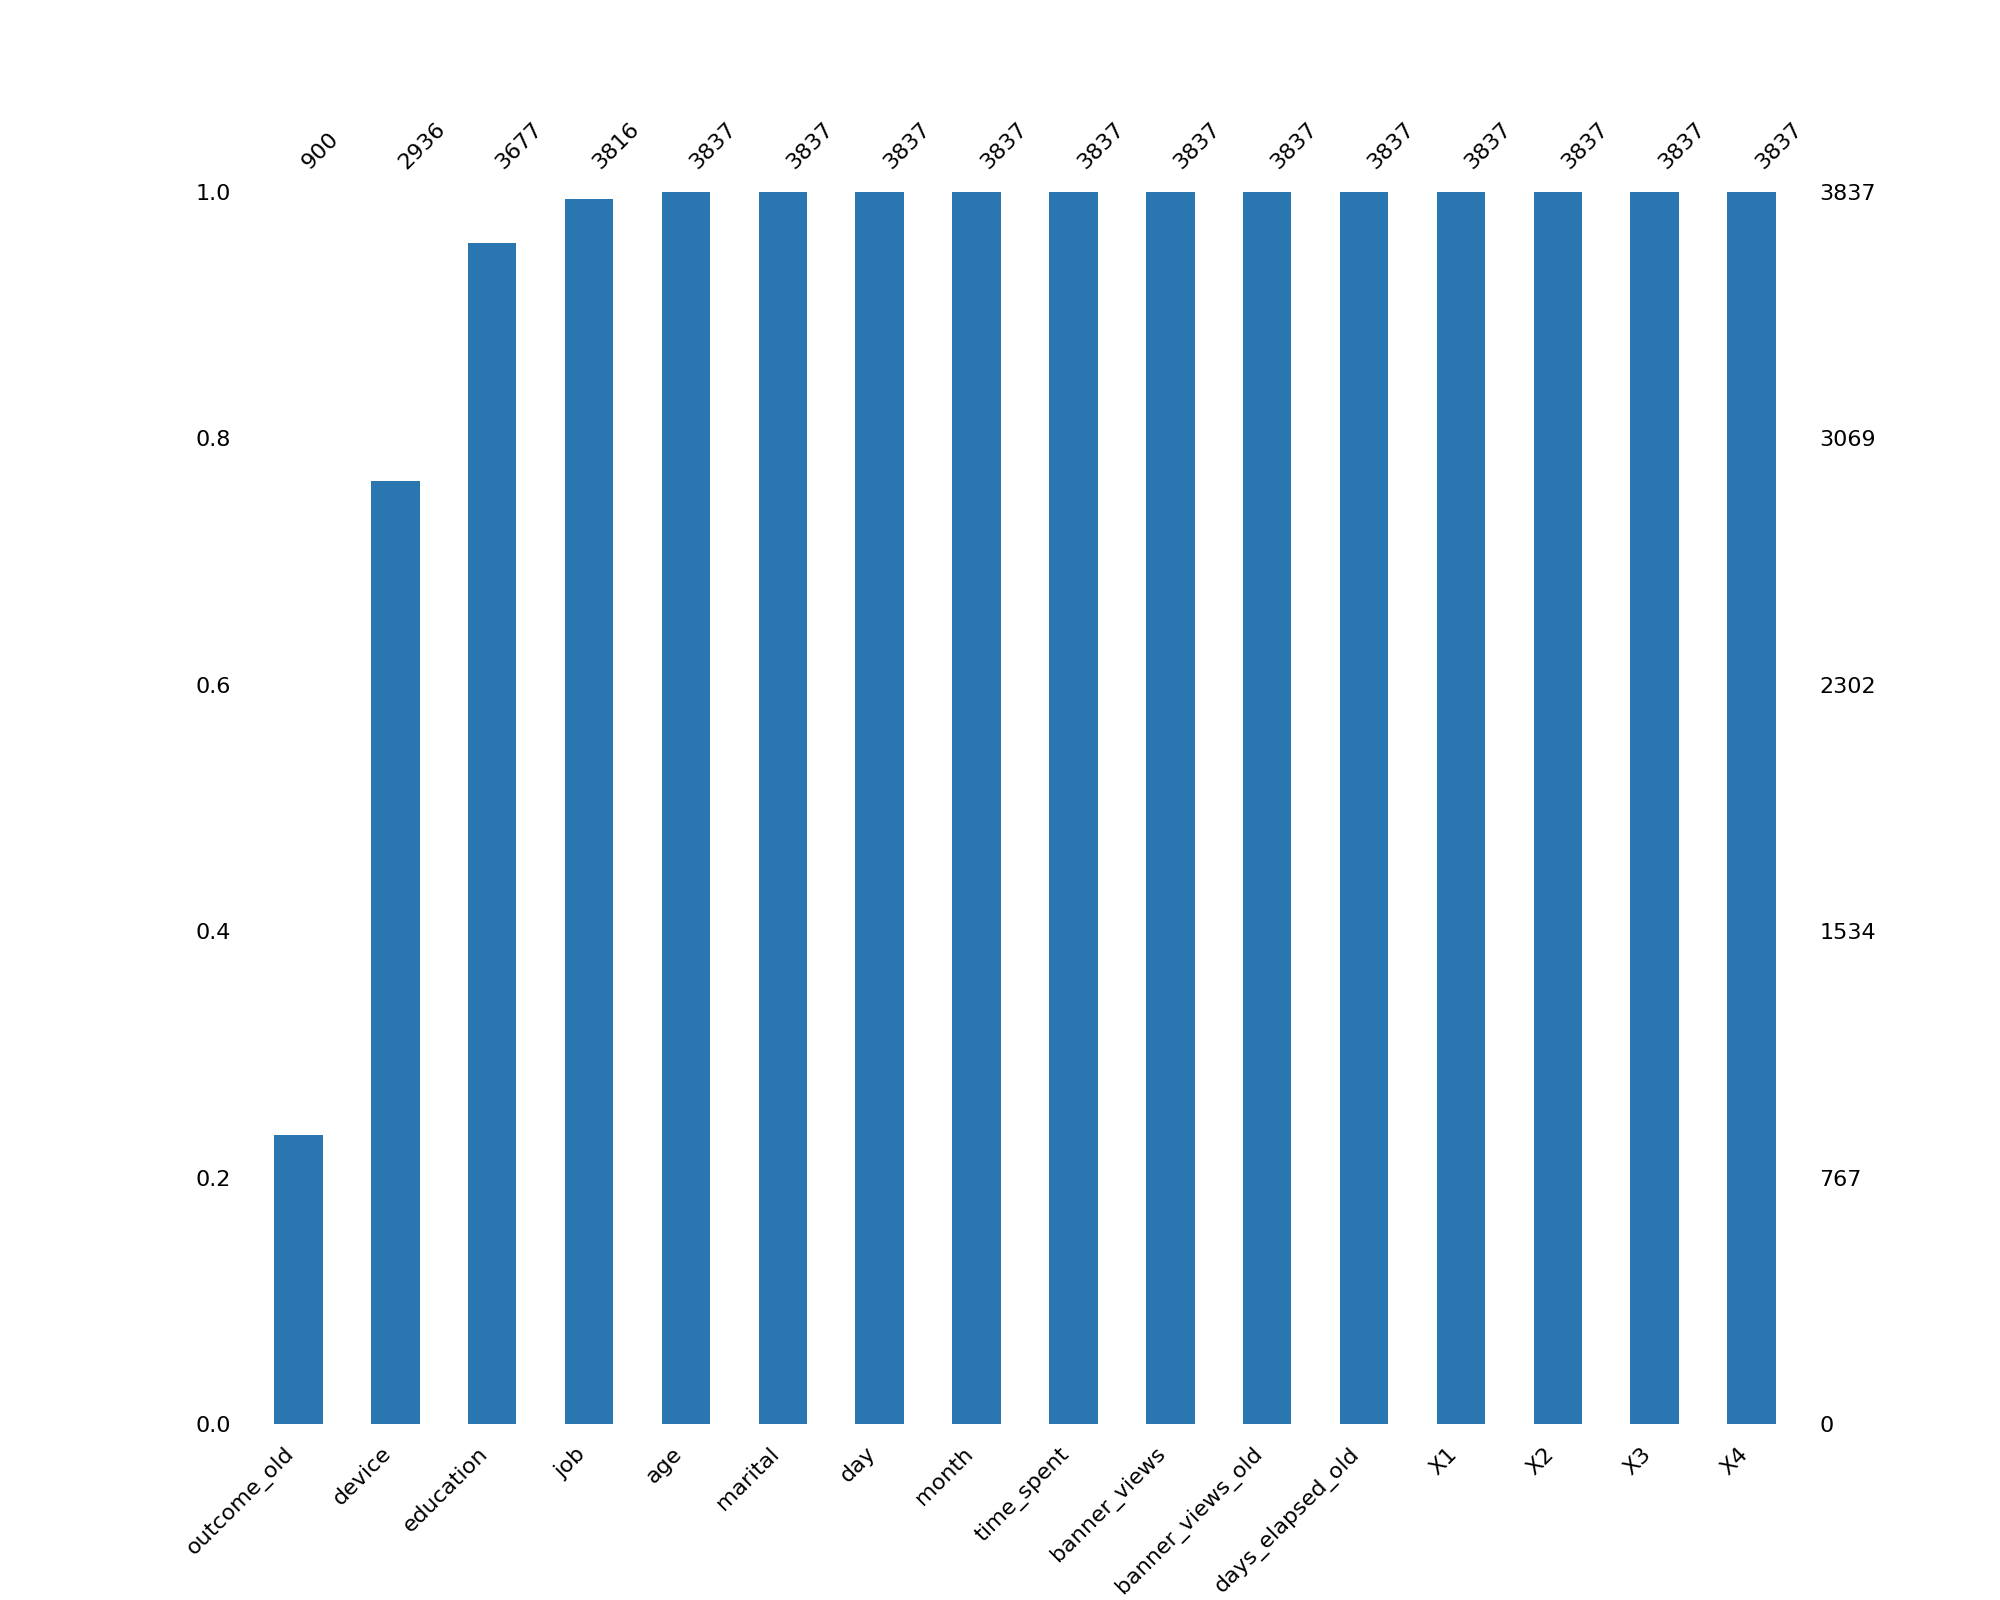

In [39]:
# Set the desired color
color = '#2A76B1'  # Replace with your preferred color

msno.bar(campaign_ad_test, figsize = (10,8), fontsize = 8, color = color, sort = "ascending",);

Within the missing values, we see a similiar occurence with `old_outcome`, `device`, `education`, and `job`. All other variables are complete.

In [23]:
campaign_ad_test.describe()

age          day        month   time_spent  banner_views   
count  3837.000000  3837.000000  3837.000000  3837.000000   3837.000000  \
mean     41.062549    15.562679     6.106072    16.696377      2.643471   
std      11.680208     8.372770     2.520295    16.489023      2.914504   
min      18.000000     1.000000     1.000000     0.000000      1.000000   
25%      32.000000     8.000000     5.000000     5.800000      1.000000   
50%      39.000000    15.000000     6.000000    11.250000      2.000000   
75%      49.000000    21.000000     8.000000    21.750000      3.000000   
max      93.000000    31.000000    12.000000   138.000000     41.000000   

       banner_views_old  days_elapsed_old           X1           X2   
count       3837.000000       3837.000000  3837.000000  3837.000000  \
mean           0.753714         46.994266     0.129268     0.015116   
std            2.152808        104.775190     0.335540     0.122030   
min            0.000000         -1.000000     0.000000     0.000000   
25%            0.000000         -1.000000     0.000000     0.000000   
50%            0.000000         -1.000000     0.000000     0.000000   
75%            0.000000         -1.000000     0.000000     0.000000   
max           55.000000        828.000000     1.000000     1.000000   

                X3           X4  
count  3837.000000  3837.000000  
mean      0.490748     0.086554  
std       0.499980     0.026763  
min       0.000000     0.054936  
25%       0.000000     0.073775  
50%       0.000000     0.077742  
75%       1.000000     0.088237  
max       1.000000     0.588764

Between the training and set quantitative varaibles, there is not much difference between the averages of each. For example, `age` in training was 41.2 years while the test was a slightly lower at 41.1. `time_spent` slightly decreased on average compared to training, and the `banner_views` saw the opposite impact, as the views increased from the training data.

For the profile of the individual who is most likely to subscribe, it is not possible for the test data since `subscription` is not given.

In [24]:
# Continuous variables to look at distribution
camp_num_melt_test = campaign_ad_test[['age', 'time_spent', 'banner_views', 'banner_views_old', 'days_elapsed_old', 'X4']].melt()

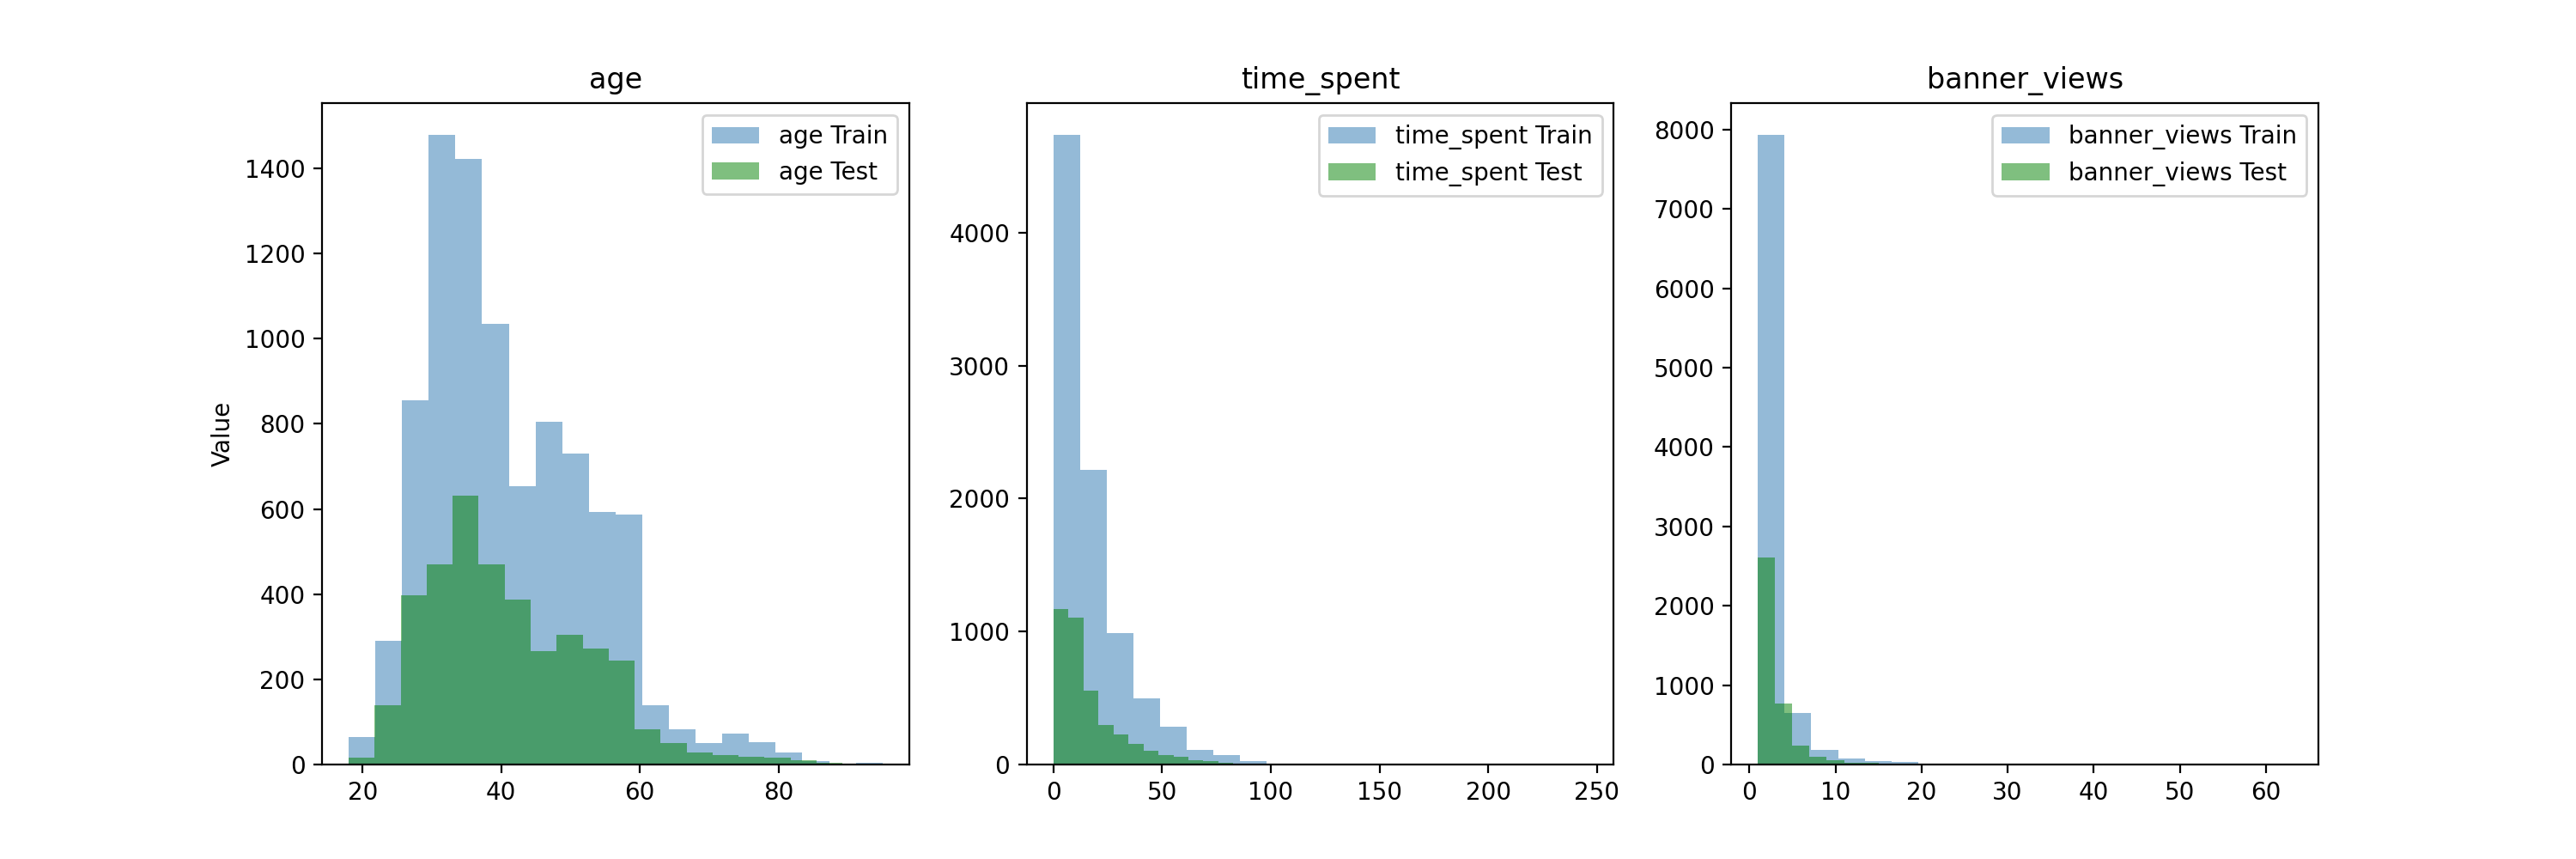

In [36]:
# Set the figure size
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1) # row 1, col 2 index 1
plt.hist(campaign_ad['age'], bins=20, color='#2A76B1', alpha=0.5, label='age Train')
plt.hist(campaign_ad_test['age'], bins=20, color='green', alpha=0.5, label='age Test')
plt.title("age")
plt.ylabel('Value')
plt.legend()


plt.subplot(1, 3, 2) # row 1, col 2 index 1
plt.hist(campaign_ad['time_spent'], bins=20, color='#2A76B1', alpha=0.5, label='time_spent Train')
plt.hist(campaign_ad_test['time_spent'], bins=20, color='green', alpha=0.5, label='time_spent Test')
plt.title("time_spent")
plt.legend()


plt.subplot(1, 3, 3) # row 1, col 2 index 1
plt.hist(campaign_ad['banner_views'], bins=20, color='#2A76B1', alpha=0.5, label='banner_views Train')
plt.hist(campaign_ad_test['banner_views'], bins=20, color='green', alpha=0.5, label='banner_views Test')
plt.title("banner_views")
plt.legend()


Within these first these histograms, the proportion of the test observations (3,837) is much less than training which has about 9,000 rows. This is irrelevant though as we want to analyze the relative distributions of each predictor. For `age`, the train set appears to be more rigid than the test data, but as seen earlier have a similiar mean. In addition, `time_spent`'s bins one and two do not have a large difference in the test as the training set does. On the other hand,  `banner_views` appears to follow a similiar distribution between the respetive sets, but the gap between bin one and two still appear to be closer then in training.

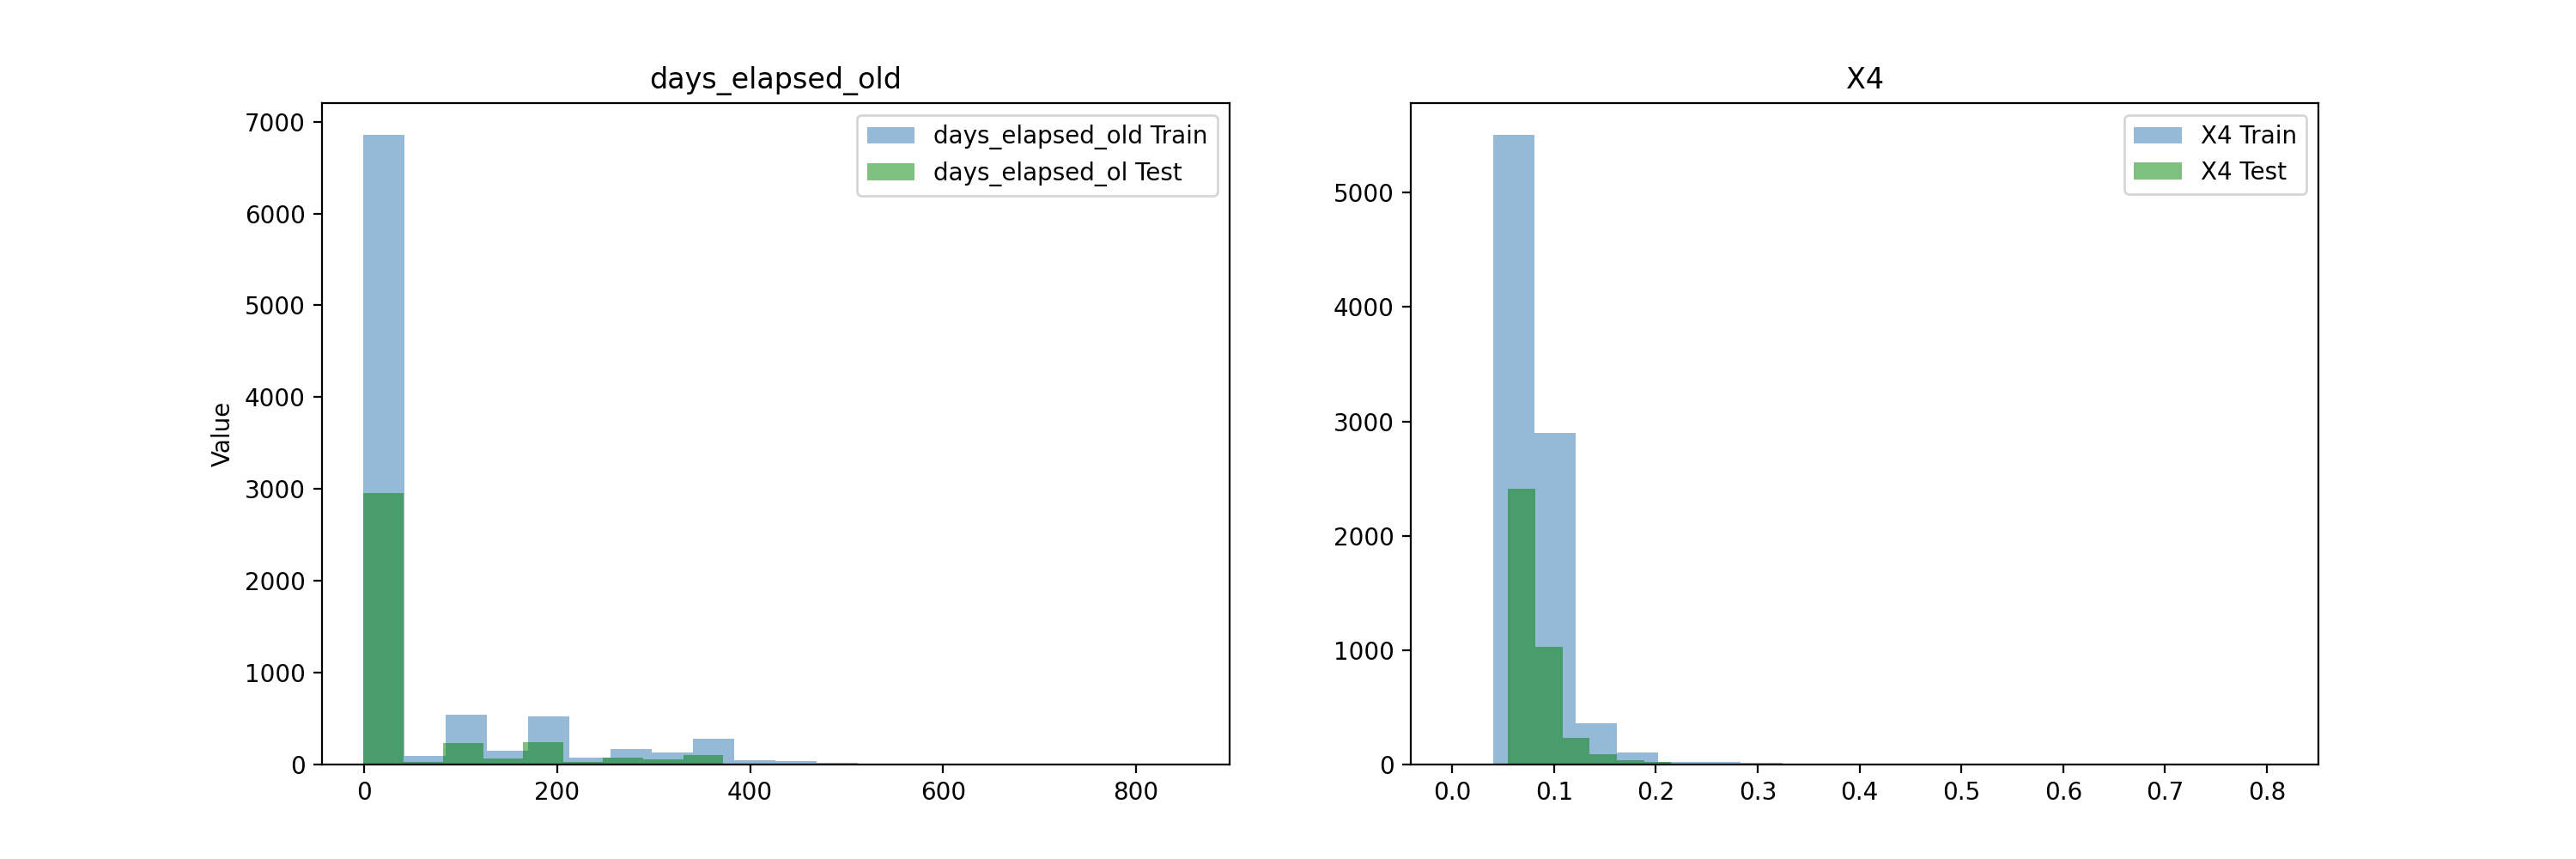

In [37]:
# Set the figure size
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.hist(campaign_ad['days_elapsed_old'], bins=20, color='#2A76B1', alpha=0.5, label='days_elapsed_old Train')
plt.hist(campaign_ad_test['days_elapsed_old'], bins=20, color='green', alpha=0.5, label='days_elapsed_ol Test')
plt.title("days_elapsed_old")
plt.ylabel('Value')
plt.legend()

plt.subplot(1, 2, 2) # row 1, col 2 index 1
plt.hist(campaign_ad['X4'], bins=20, color='#2A76B1', alpha=0.5, label='X4 Train')
plt.hist(campaign_ad_test['X4'], bins=20, color='green', alpha=0.5, label='X4 Test')
plt.title("X4")
plt.legend()


The other two predictors where we wanted to compare the training and test set distributions was between `days_elapsed_old` and `X4`. Both of them appear relatively similiar in their pattern. Keep in mind that the test set for these five predictors did not compare against `subscription` since the response was not included in that data set.

c:\Users\emann\anaconda3\lib\site-packages\plotnine\themes\themeable.py:1902: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This paramater will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.


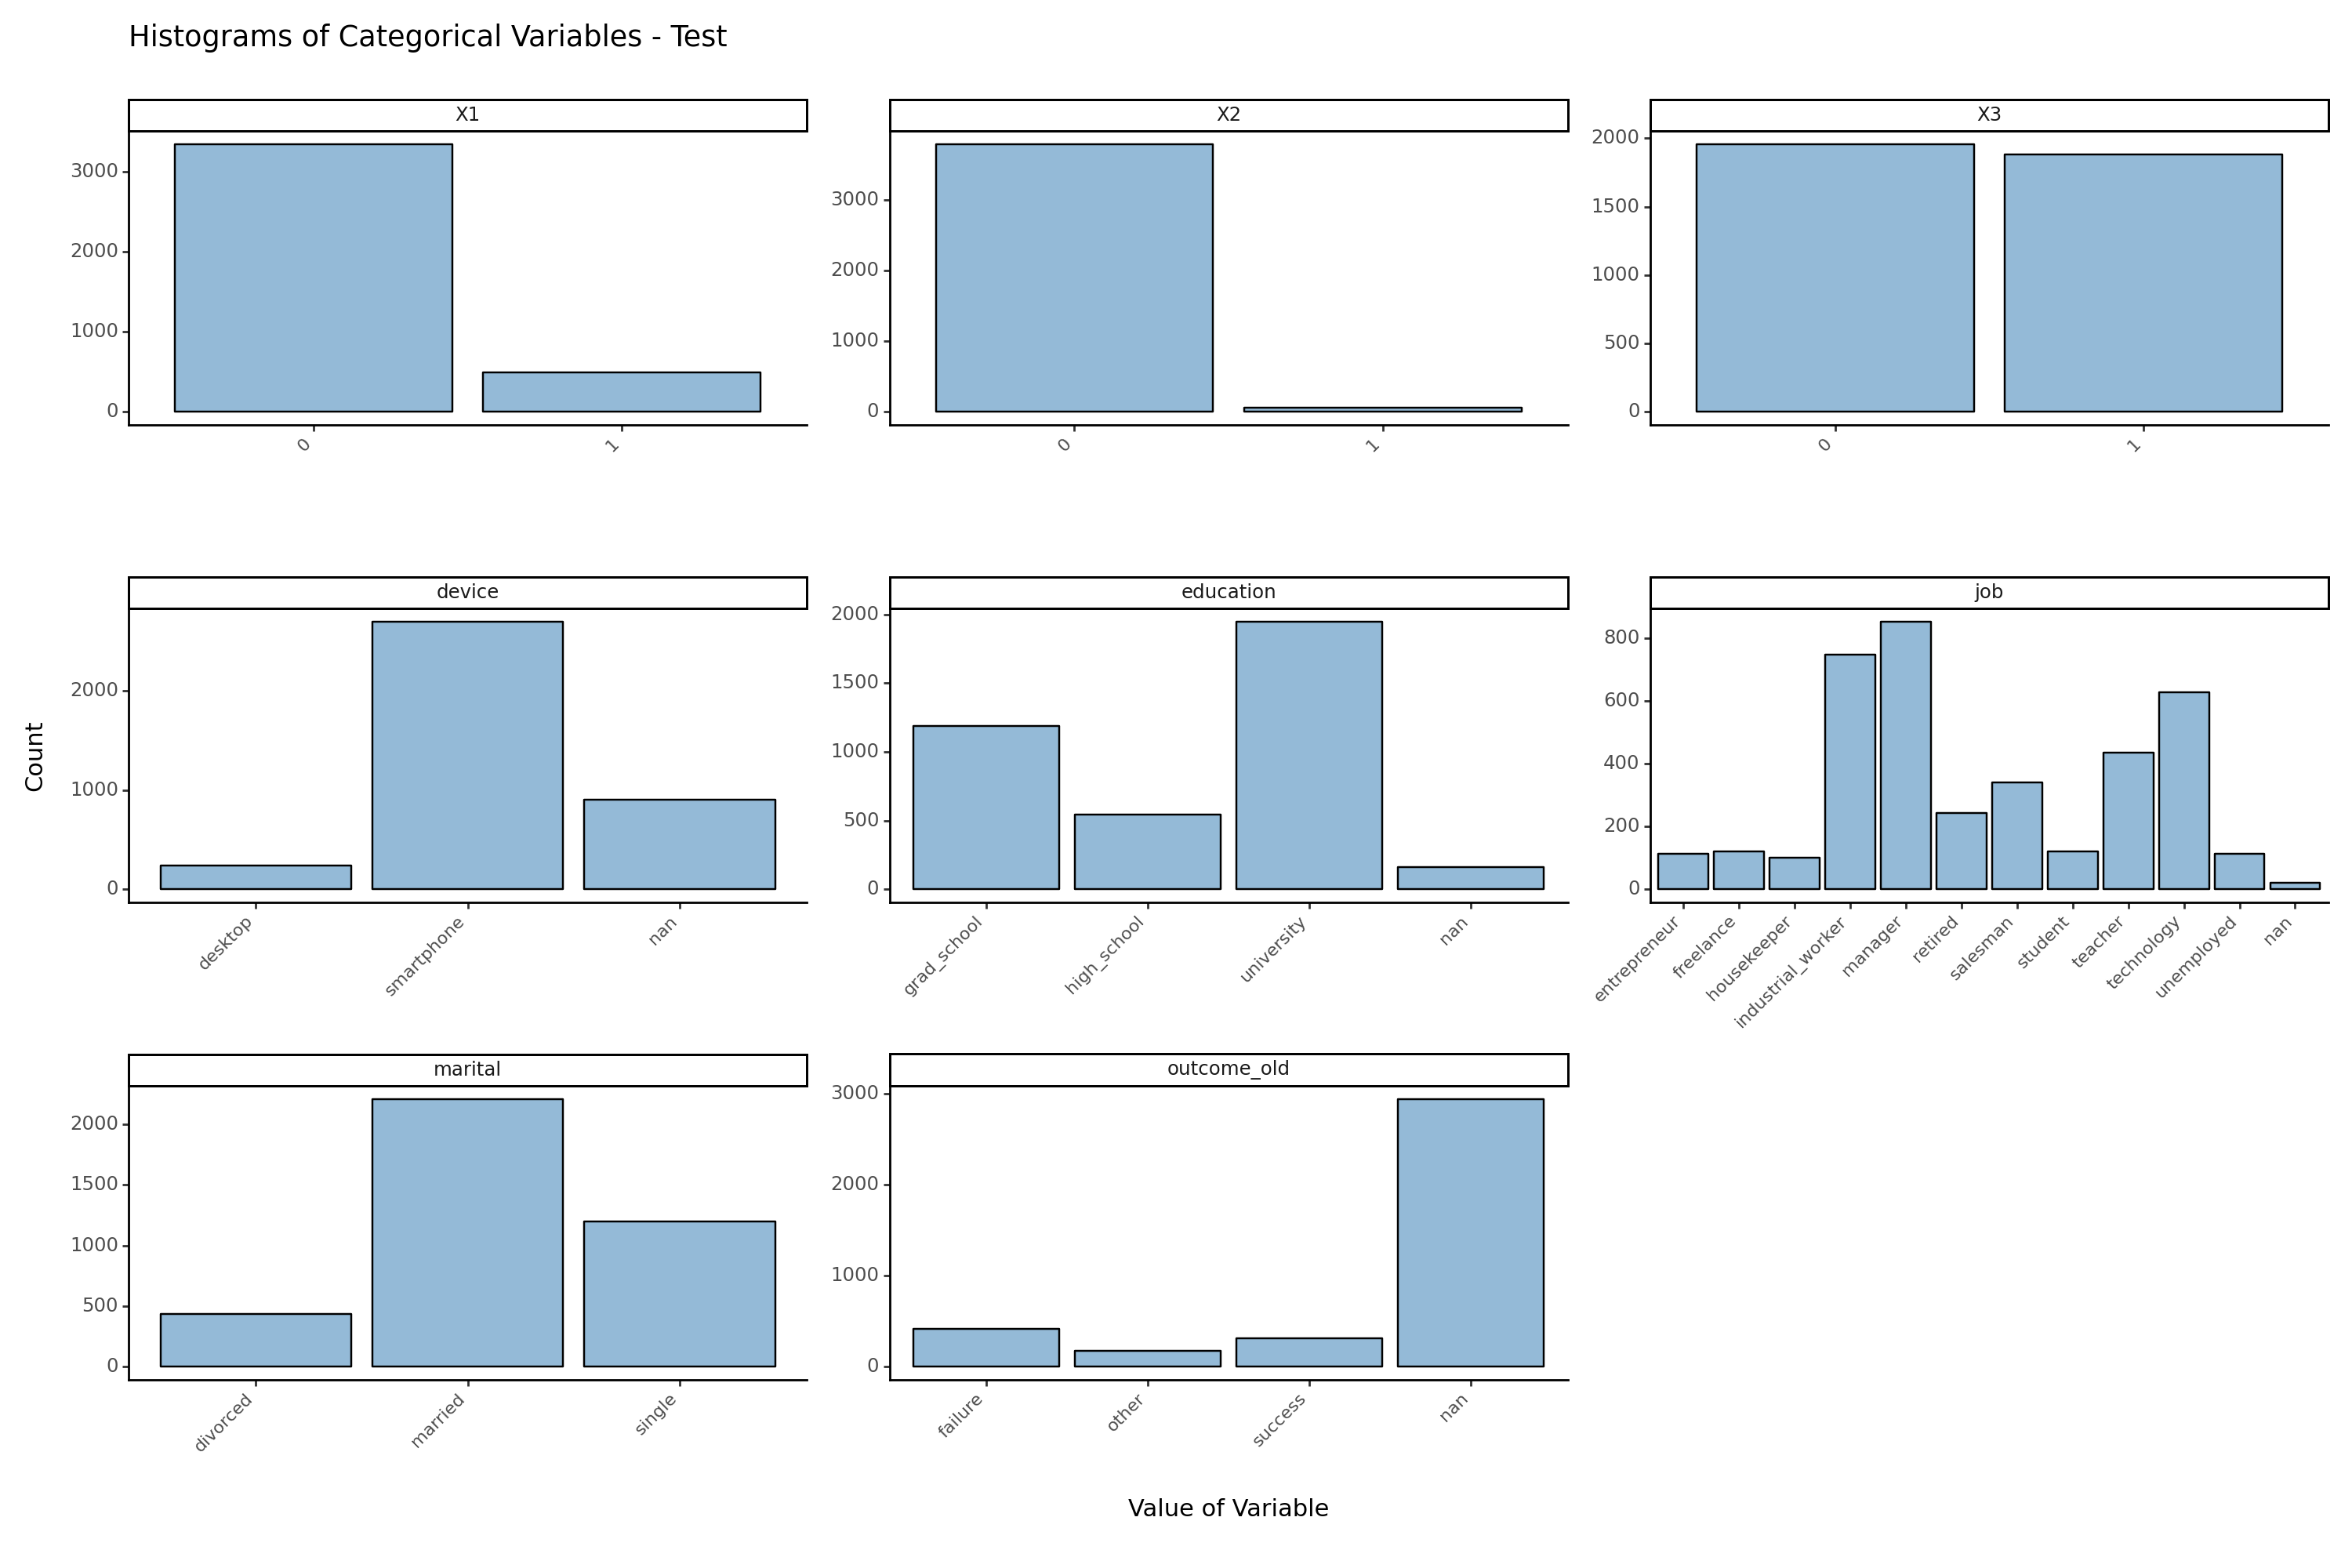

<Figure Size: (1500 x 1000)>

In [38]:
# Plot histogram for qualitative variables to look at distribution
camp_cat_melt_test = campaign_ad_test[['job', 'marital', 'education', 'device', 'outcome_old', 'X1', 'X2', 'X3']].melt()

ggplot(camp_cat_melt_test) + \
    aes('value') + \
    facet_wrap('variable', scales = 'free') + \
    geom_bar(fill = '#2A76B1', color = 'black', alpha = 0.5) + \
    theme_classic() + \
    theme(subplots_adjust = {'wspace': 0.5, 'hspace': 0.5},
          axis_text_x = element_text(angle = 45, vjust = 1, hjust = 1, size = 8),
          figure_size = (15, 10),
          axis_title_x = element_text(margin = {'t': 20})) + \
    labs(title = 'Histograms of Categorical Variables - Test',
         x = 'Value of Variable',
         y = 'Count')

Other than `subscription` not being present within the test set, all of the other categorical predictors dictributions look almost exactly like the training set.

Throughout each model in the **Attempted Models** section, there will be additional data exploration such as reviewing correlations, variance inflation factor (VIF), etc.